![](https://i.pinimg.com/736x/bd/a6/ff/bda6ff8e1cb63e11473ab9da48d9d764.jpg)

**Factors of Depression: A Machine Learning Approach**

**Purpose:**

In this notebook, we aim to delve into the impact of various characteristics of 234,500 (60% of data will be used for training machine learning models) individuals and uncover the relationships between these factors and depression. By analyzing data from a comprehensive mental health survey, we seek to identify potential patterns, correlations, and underlying factors contributing to depression. This exploration not only enhances our understanding of mental health dynamics but also aids in identifying at-risk groups, providing actionable insights for prevention, intervention, and policy-making efforts. Our analysis will focus on features such as age, gender, city, profession, working or studying hours, diatery habits, degree, ... 

**Process:**

First, we start by importing the necessary libraries and loading the dataset. Commonly used libraries include pandas for data manipulation, NumPy for numerical computations, Matplotlib and Seaborn for visualizations, and scikit-learn for machine learning tasks. We also ensure any specialized libraries required for the project, such as CatBoost, XGBoost, and LightGBM, are imported.

Next, we explore the dataset to understand its structure and characteristics. This involves inspecting the data types of each column to ensure they're correctly assigned, viewing a sample of rows to check for anomalies, and analyzing the distribution of missing values. Missing data is a significant challenge in this dataset, so we assess its extent and strategize how to handle it (e.g., imputation, removal, or substitution).

Once we have a basic understanding of the data, we move on to the data cleaning process. This step includes:

- Addressing inconsistencies in columns like Sleep Duration and Degree. For instance, this may involve standardizing units, correcting erroneous values, or handling outliers.
- Combining complementary columns such as Work Pressure and Academic Pressure into a single metric or feature to simplify analysis while retaining information.

After cleaning, we perform an exploratory data analysis (EDA) to gain deeper insights into the data. This involves:

- Visualizing each column to understand its distribution, identify potential outliers, and detect patterns or trends.
- Investigating relationships between variables, particularly their association with the target variable, Depression. We use plots like box plots, bar charts, and histograms.
- Computing correlation matrices to quantify the strength and direction of relationships between numerical features.
- 
The next step is feature engineering, where we enhance the dataset by:

- Creating new features from existing ones (e.g., deriving Sleep Efficiency).
- Converting features into more useful formats, such as encoding categorical variables using one-hot encoding or label encoding, scaling numerical features, and transforming skewed distributions to approximate normality.

Finally, we proceed to the modeling phase. 
We train multiple machine learning models, including CatBoost, XGBoost, and LightGBM, as they are well-suited for structured data and handle missing values effectively. To ensure robust evaluation, we employ a 7-fold cross-validation strategy, splitting the data into training and validation sets multiple times to reduce overfitting and assess model performance consistently. Hyperparameter tuning is performed to optimize the models' performance.

**Evaluation:**

This task will be evaluated using the Accuracy Score as the primary metric. Accuracy measures the proportion of correctly predicted instances out of the total predictions made, reflecting how closely the model's outputs align with the true labels. By focusing on accuracy, we aim to ensure the reliability and validity of our findings, providing a robust foundation for actionable insights.
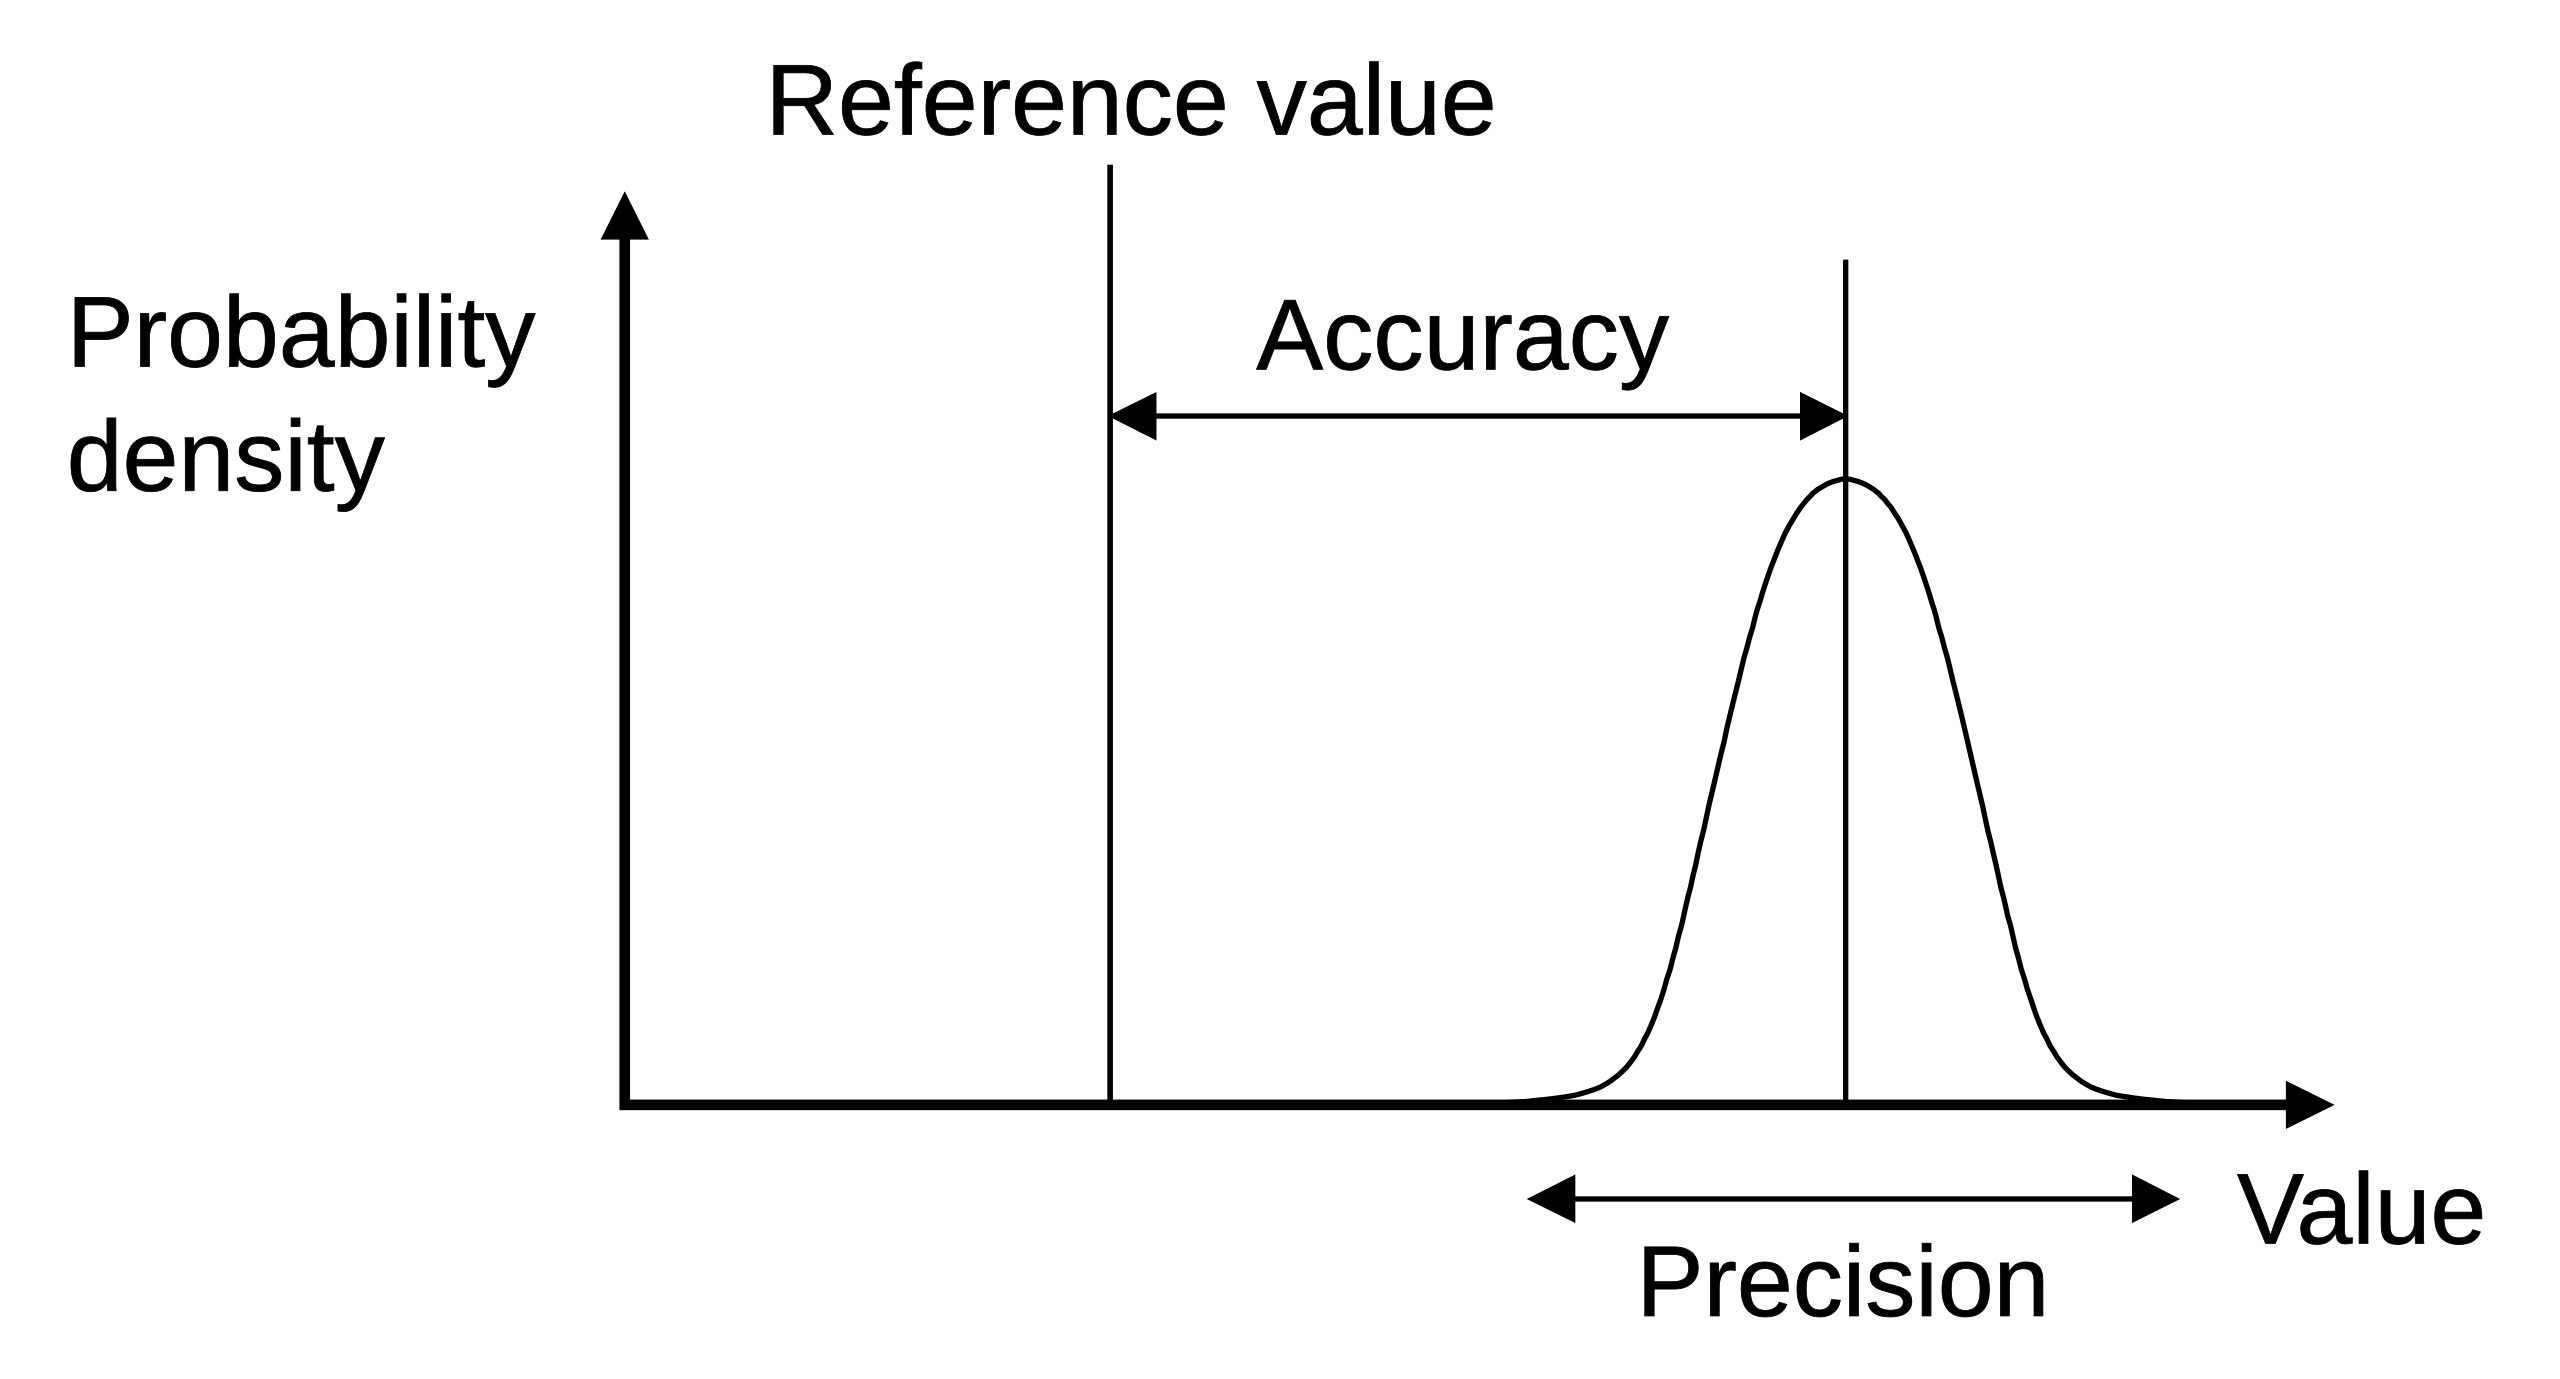
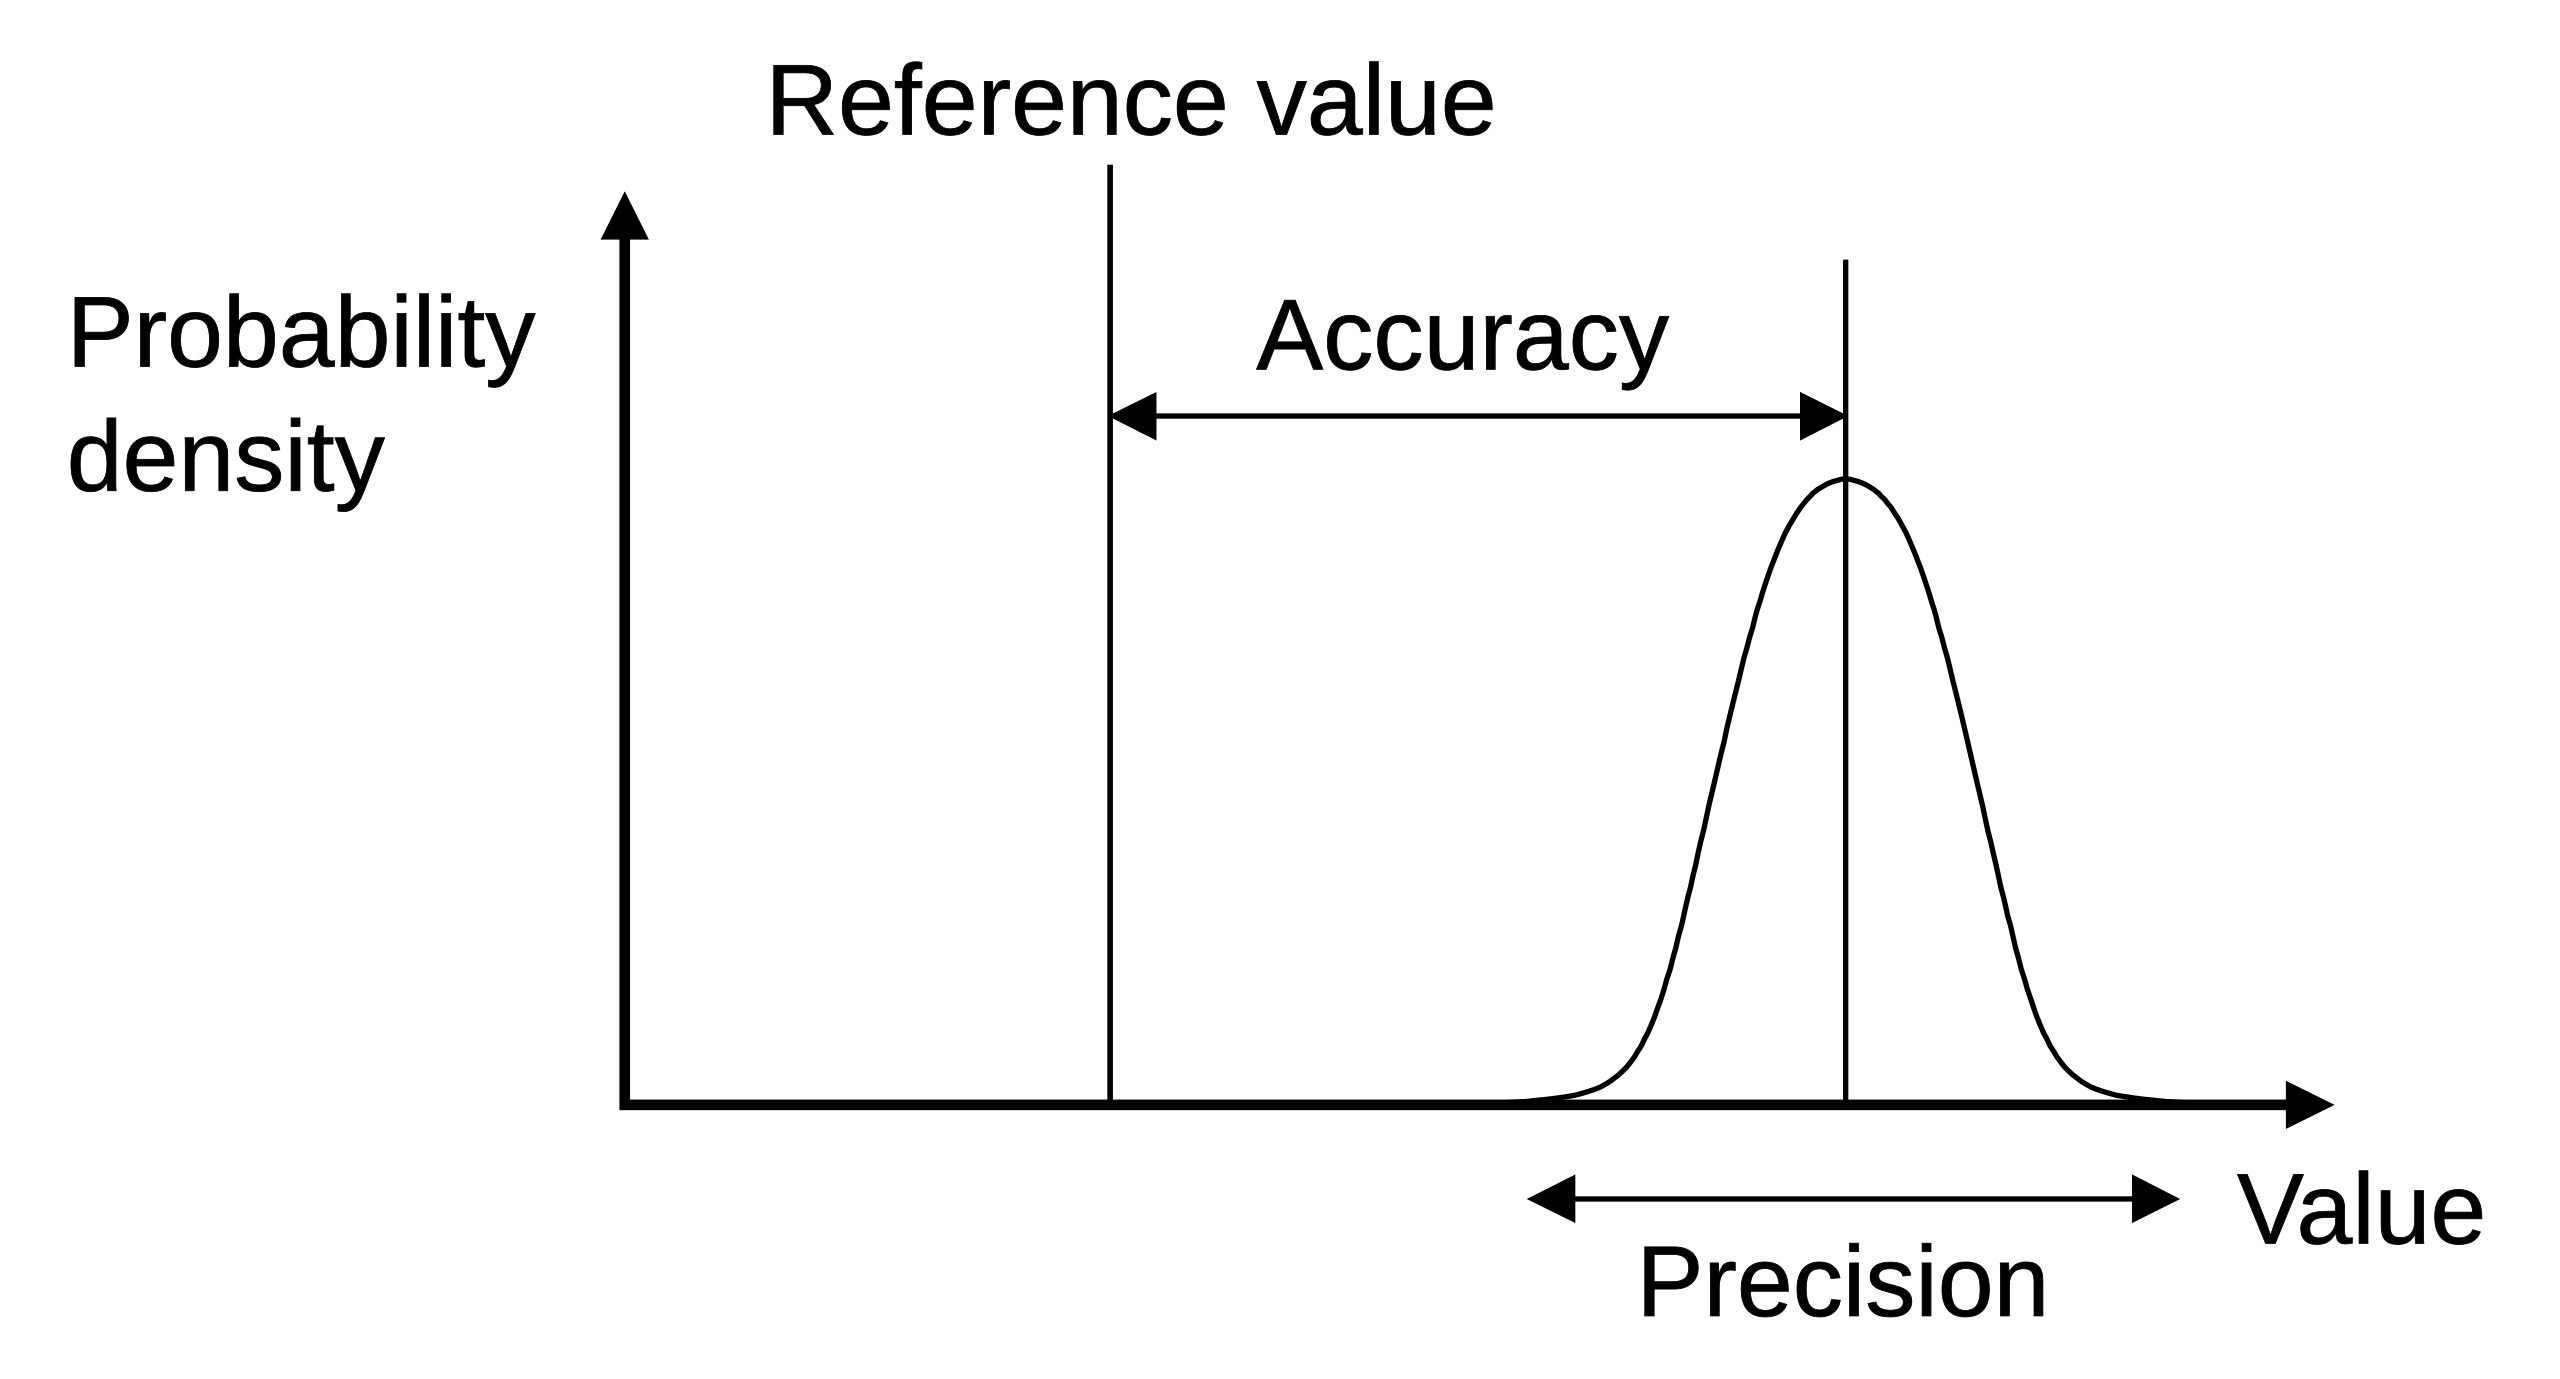

# Import libraries

In [1]:
# Core Libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and working with arrays
import random  # For generating random numbers
from scipy import stats  # For statistical functions and tests
import warnings  # To manage warning messages
from tabulate import tabulate  # For printing tabular data in a clean, formatted way
warnings.filterwarnings("ignore")  # Ignore warnings

# Visualization Libraries

import matplotlib.pyplot as plt  # For static 2D plotting
from matplotlib.colors import LinearSegmentedColormap  # For custom colormaps
import seaborn as sns  # For statistical data visualization
import plotly.graph_objects as go  # For creating flexible and customizable interactive plots
import plotly.express as px  # For creating quick interactive visualizations
import squarify  # For creating treemaps

# Machine Learning Libraries

from category_encoders import TargetEncoder  # For encoding categorical variables based on target values
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.metrics import make_scorer, accuracy_score  # For evaluating model performance
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For splitting data and model tuning
from sklearn.model_selection import StratifiedKFold  # For cross-validation
from sklearn.ensemble import VotingClassifier  # For ensemble models
from xgboost import XGBClassifier  # For gradient boosting models (XGBoost)
from catboost import CatBoostClassifier  # For categorical data-friendly gradient boosting
import lightgbm as lgb  # For LightGBM gradient boosting
import optuna  # For hyperparameter optimization
import numpy as np  # For numerical computations
from tqdm import tqdm  # Optional, for progress bar
from optuna.logging import set_verbosity, WARNING
set_verbosity(WARNING) # Suppress Optuna logs
import logging
logging.getLogger().setLevel(logging.ERROR)  # Suppress logging

# Other Configurations

rs = 42  # Random seed
N_TRIALS = 100  # Number of optimization trials
# Set custom color palette for Seaborn
colors = ['#0077b6', '#90e0ef', '#ef476f', '#ffd166', '#118ab2', '#06d6a0', '#f9c74f']
sns.set_palette(colors)

# Read data

In [2]:
# Load the data
df_train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

# Concatenate the dataframes
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# Display the first 5 rows
df.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,dataset
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0,train
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0,train
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0,train
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0,train
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0,train


In [3]:
# Define the target column
target_column = "Depression"

# Explore data

The DataFrame has 234500 rows and 21 columns.
The DataFrame has 0 duplicate rows.


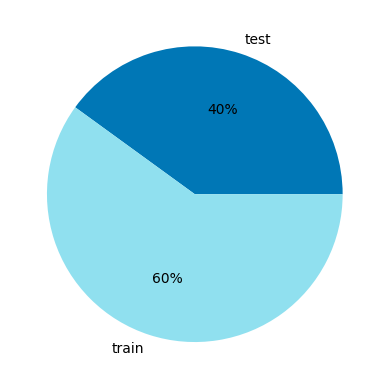

In [4]:
# Counting rows and columns
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

# Counting duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"The DataFrame has {duplicate_rows_count} duplicate rows.")

# Create a pivot table to compare train and test size
pivot_table = df.pivot_table(index="dataset", values="id", aggfunc="count")

# Plot a pie chart
pivot_table.plot.pie(y="id", legend=False, autopct="%1.0f%%", ylabel="")

# Show the plot
plt.show()

## Date types

In [5]:
# Analyze the data types of columns in a DataFrame.
def analyze_column_types(df: pd.DataFrame):
    """
    Returns a tuple containing:
        - table_data: A list of rows with column name, data type, and type.
        - numerical_columns: A list of numerical column names.
        - categorical_columns: A list of categorical column names.
    """
    table_data = []
    numerical_columns = []
    categorical_columns = []

    for column in df.columns:
        column_data_type = df[column].dtype  # Determine data type of the column

        # Classify column type
        if column_data_type in ['int64', 'float64']:
            column_type = "Numerical"
            numerical_columns.append(column)
        elif column_data_type in ['object', 'category']:
            column_type = "Categorical"
            categorical_columns.append(column)
        else:
            column_type = "Other"

        # Add the column analysis to the table data
        table_data.append([column, column_data_type, column_type])

    return table_data, numerical_columns, categorical_columns

# Using the function for the dataframe
table_data, numerical_columns, categorical_columns = analyze_column_types(df)

# Display the results in a tabulated format
print(
    tabulate(
        table_data,
        headers=["Column Name", "Data Type", "Type"],
        tablefmt="rounded_grid",
        maxcolwidths=[15, 10, 20]))


╭─────────────────┬─────────────┬─────────────╮
│ Column Name     │ Data Type   │ Type        │
├─────────────────┼─────────────┼─────────────┤
│ id              │ int64       │ Numerical   │
├─────────────────┼─────────────┼─────────────┤
│ Name            │ object      │ Categorical │
├─────────────────┼─────────────┼─────────────┤
│ Gender          │ object      │ Categorical │
├─────────────────┼─────────────┼─────────────┤
│ Age             │ float64     │ Numerical   │
├─────────────────┼─────────────┼─────────────┤
│ City            │ object      │ Categorical │
├─────────────────┼─────────────┼─────────────┤
│ Working         │ object      │ Categorical │
│ Professional or │             │             │
│ Student         │             │             │
├─────────────────┼─────────────┼─────────────┤
│ Profession      │ object      │ Categorical │
├─────────────────┼─────────────┼─────────────┤
│ Academic        │ float64     │ Numerical   │
│ Pressure        │             │       

In [6]:
# Analyze and summarize the properties of numerical and categorical columns

# Initialize tables for storing analysis results
numerical_table = []
categorical_table = []

# Analyze numerical columns
for column in numerical_columns:
    # Compute minimum and maximum values for the column
    min_val = df[column].min()
    max_val = df[column].max()
    # Get up to 3 unique sample values
    samples = df[column].unique()[:3].tolist()
    # Append results to the numerical table
    numerical_table.append([column, f"[{min_val}, {max_val}]", samples])

# Analyze categorical columns
for column in categorical_columns:
    # Get unique values and their count
    unique_values = df[column].unique()[:5]
    count = df[column].nunique()
    # Append results to the categorical table
    categorical_table.append([column, count, list(unique_values)])

# Print the analysis results
if numerical_table:
    print("Numerical Columns:")
    print(tabulate(
        numerical_table,
        headers=["Column Name", "Value Range", "3 Samples"],
        tablefmt="rounded_grid"))
else:
    print("No numerical columns found.")

if categorical_table:
    print("\nCategorical Columns:")
    print(tabulate(
        categorical_table,
        headers=["Column Name", "Category Count", "Categories (Up to 5)"],
        tablefmt="rounded_grid",
        maxcolwidths=[10, 10, 15]))  # Adjust column widths for better alignment
else:
    print("No categorical columns found.")

Numerical Columns:
╭────────────────────┬───────────────┬────────────────────╮
│ Column Name        │ Value Range   │ 3 Samples          │
├────────────────────┼───────────────┼────────────────────┤
│ id                 │ [0, 234499]   │ [0, 1, 2]          │
├────────────────────┼───────────────┼────────────────────┤
│ Age                │ [18.0, 60.0]  │ [49.0, 26.0, 33.0] │
├────────────────────┼───────────────┼────────────────────┤
│ Academic Pressure  │ [1.0, 5.0]    │ [nan, 5.0, 2.0]    │
├────────────────────┼───────────────┼────────────────────┤
│ Work Pressure      │ [1.0, 5.0]    │ [5.0, 4.0, nan]    │
├────────────────────┼───────────────┼────────────────────┤
│ CGPA               │ [5.03, 10.0]  │ [nan, 8.97, 5.9]   │
├────────────────────┼───────────────┼────────────────────┤
│ Study Satisfaction │ [1.0, 5.0]    │ [nan, 2.0, 5.0]    │
├────────────────────┼───────────────┼────────────────────┤
│ Job Satisfaction   │ [1.0, 5.0]    │ [2.0, 3.0, nan]    │
├────────────────────

## Missing Values

In [7]:
# Initialize a list to store the missing data details
missing_data = []

# Get column names and the count of missing values for each column
columns = df.columns
missing_counts = df.isnull().sum()
total_rows = df.shape[0]

# Loop through each column and count of missing values
for column, missing_count in zip(columns, missing_counts):
    if missing_count > 0:
        # Calculate the percentage of missing values
        missing_percentage = (missing_count / total_rows) * 100
        # Append details to the missing_data list
        missing_data.append([column, missing_count, f"{missing_percentage:.2f}%"])

# Display the missing data table if any missing values exist
print("Missing values")

if missing_data:
    print(tabulate(missing_data, 
                   headers=["Column Name", "Missing Count", "Percentage"], 
                   tablefmt="rounded_grid", 
                   maxcolwidths=[20, 10, 10]))
else:
    print("No missing values found!")


Missing values
╭────────────────────┬─────────────────┬──────────────╮
│ Column Name        │   Missing Count │ Percentage   │
├────────────────────┼─────────────────┼──────────────┤
│ Profession         │           61262 │ 26.12%       │
├────────────────────┼─────────────────┼──────────────┤
│ Academic Pressure  │          187836 │ 80.10%       │
├────────────────────┼─────────────────┼──────────────┤
│ Work Pressure      │           46696 │ 19.91%       │
├────────────────────┼─────────────────┼──────────────┤
│ CGPA               │          187836 │ 80.10%       │
├────────────────────┼─────────────────┼──────────────┤
│ Study Satisfaction │          187836 │ 80.10%       │
├────────────────────┼─────────────────┼──────────────┤
│ Job Satisfaction   │           46684 │ 19.91%       │
├────────────────────┼─────────────────┼──────────────┤
│ Dietary Habits     │               9 │ 0.00%        │
├────────────────────┼─────────────────┼──────────────┤
│ Degree             │           

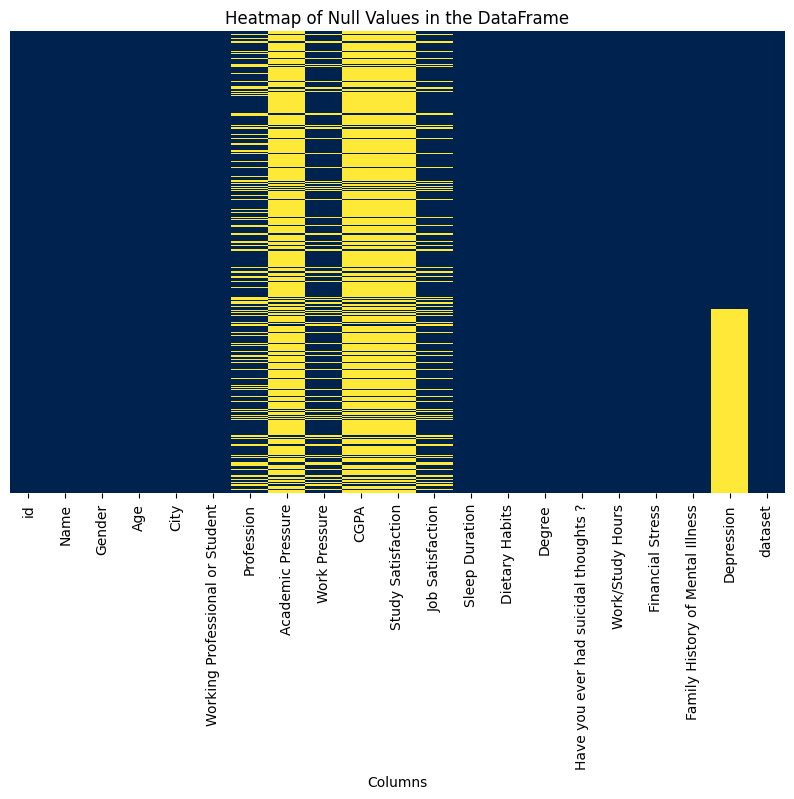

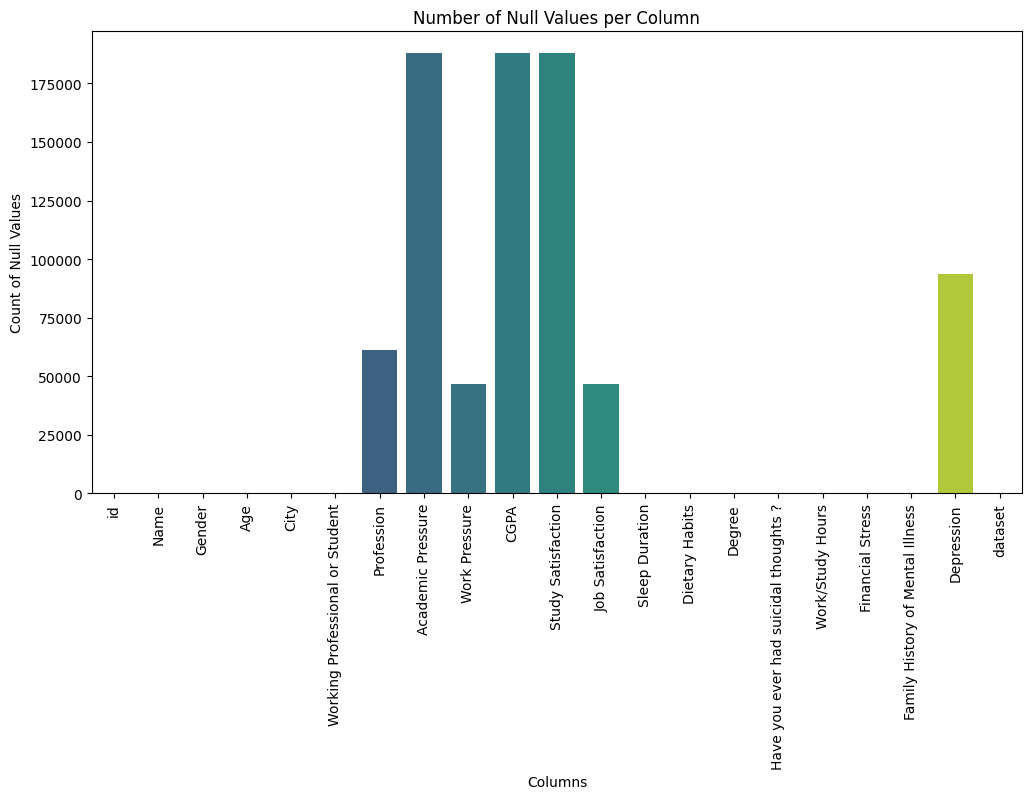

In [8]:
# 1. Heatmap of Null Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='cividis', cbar=False, yticklabels=False)
plt.title('Heatmap of Null Values in the DataFrame')
plt.xlabel('Columns')
plt.show()

# 2. Bar Chart of Null Value Count
null_counts = df.isnull().sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Number of Null Values per Column')
plt.ylabel('Count of Null Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.show()

# Data cleaning

## Cleaning Sleep hours

In [9]:
# Function to clean and convert sleep hours
def convert_sleep_hours(value):
    try:
        # Remove the word 'hours' for consistent processing
        value = value.replace('hours', '').strip()
        
        # Handle ranges (e.g., "5-6")
        if '-' in value:
            hours = [float(h) for h in value.split('-') if h.strip().isdigit()]
            return sum(hours) / len(hours)  # Calculate the average of the range
        
        # Handle "More than X"
        elif 'More than' in value:
            return float(value.split(' ')[-1]) + 0.5
        
        # Handle "Less than X"
        elif 'Less than' in value:
            return float(value.split(' ')[-1]) - 0.5
        
        # Handle specific numbers
        elif value.isdigit():
            return float(value)
        
        # Replace irrelevant or unprocessable entries with NaN
        else:
            return np.nan
    except:
        return np.nan

df["Sleep Duration"] = df["Sleep Duration"].apply(convert_sleep_hours)

In [10]:
# Cleaning Outlier Sleep Duration

Q1 = df["Sleep Duration"].quantile(0.25)
Q3 = df["Sleep Duration"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df["Sleep Duration"] < lower_bound) | (df["Sleep Duration"] > upper_bound)]

# Since it appears that the outliers are weekly sleep durations, simply divide them by 7.
df["Sleep Duration"] = df["Sleep Duration"].apply(lambda x: x/7 if x > upper_bound else x)

## Cleaning Dietary Habits

In [11]:
# Function to clean and convert Dietary Habits
def clean_value(value):
    if value in ['Healthy', 'Unhealthy', 'Moderate']:
        return value
    elif 'No' in str(value):
        return 'Unhealthy'
    elif 'Less' in str(value):
        return 'Moderate'
    elif 'More' in str(value):
        return 'Healthy'
    elif 'Yes' in str(value):
        return 'Healthy'
    else:
        return np.nan

# Apply the cleaning function
df['Dietary Habits'] = df['Dietary Habits'].apply(clean_value)

## Cleaning Degrees

In [12]:
# Function to clean and convert Degrees
def convert_to_main_degrees(degree_list):
    # Function to determine main degree based on the first letter or keyword
    def get_degree_category(degree):
        if degree in ['MD', 'PhD', 'MBBS', 'Doctor']:
            return 'Doctorate'
        elif degree in ['MCA', 'MBA', 'M.Com', 'M.Ed', 'MSc', 'M.Tech', 'M.Arch', 'MPharm', 'MPA', 'M.S']:
            return 'Master'
        elif degree in ['BHM', 'LLB', 'B.Pharm', 'BBA', 'BSc', 'B.Arch', 'BCA', 'BE', 'BA', 'B.Ed', 'B.Com', 'B.Tech', 'B.Sc', 'BPharm', 'BArch']:
            return 'Bachelor'
        elif degree in ['Class 12', 'Class 11']:
            return 'High School'
        else:
            # Default return 'Other' for unrecognized degrees
            return 'Other'
            
    return [get_degree_category(degree) for degree in degree_list]

df['Degree'] = convert_to_main_degrees(df['Degree'])

## Other features

In [13]:
# Combining Work and Study satisfaction by creating a new features
df['Pressure'] = (df['Academic Pressure'].fillna(0) + df['Work Pressure'].fillna(0))
df['Satisfaction'] = (df['Study Satisfaction'].fillna(0) + df['Job Satisfaction'].fillna(0))

# Drop the original columns after creating new features
cols_to_drop = ['Academic Pressure', 
                'Work Pressure', 
                'Study Satisfaction', 
                'Job Satisfaction']
df.drop(columns=cols_to_drop, inplace=True)

In [14]:
# Summerizing some column names
new_names = {"Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
            "Family History of Mental Illness": "Family History"}
df = df.rename(columns = new_names)

In [15]:
# Consolidate "Student" data points from the "Working Professional or Student" column into the "Profession" column
df.loc[df["Working Professional or Student"] == "Student", "Profession"] = "Student"

# Remove "Working Professional or Student" column
df.drop(columns=["Working Professional or Student"], inplace=True)

In [16]:
# Group rare categories in "Profession" and "City" columns under "Other" 
# (threshold: less than 5 samples)

# Handle rare professions
profession_counts = df["Profession"].value_counts()
df["Profession"] = df["Profession"].replace(profession_counts[profession_counts < 5].index, "Other")

# Handle rare cities
city_counts = df["City"].value_counts()
df["City"] = df["City"].replace(city_counts[city_counts < 5].index, "Other")

In [17]:
# Clean the dataset by converting non-numerical values in numerical columns to NaN
df['Work/Study Hours'] = pd.to_numeric(df['Work/Study Hours'], errors='coerce')

In [18]:
# Replace names with fewer than 500 occurrences with 'Other'
name_counts = df["Name"].value_counts()
rare_names = name_counts[name_counts < 100].index
df["Name"] = df["Name"].replace(rare_names, 'Other')

# Visualizing

## Each Numerical and Categorical column

In [19]:
# Re-identify the numerical and categorical columns.
table_data, numerical_columns, categorical_columns = analyze_column_types(df)

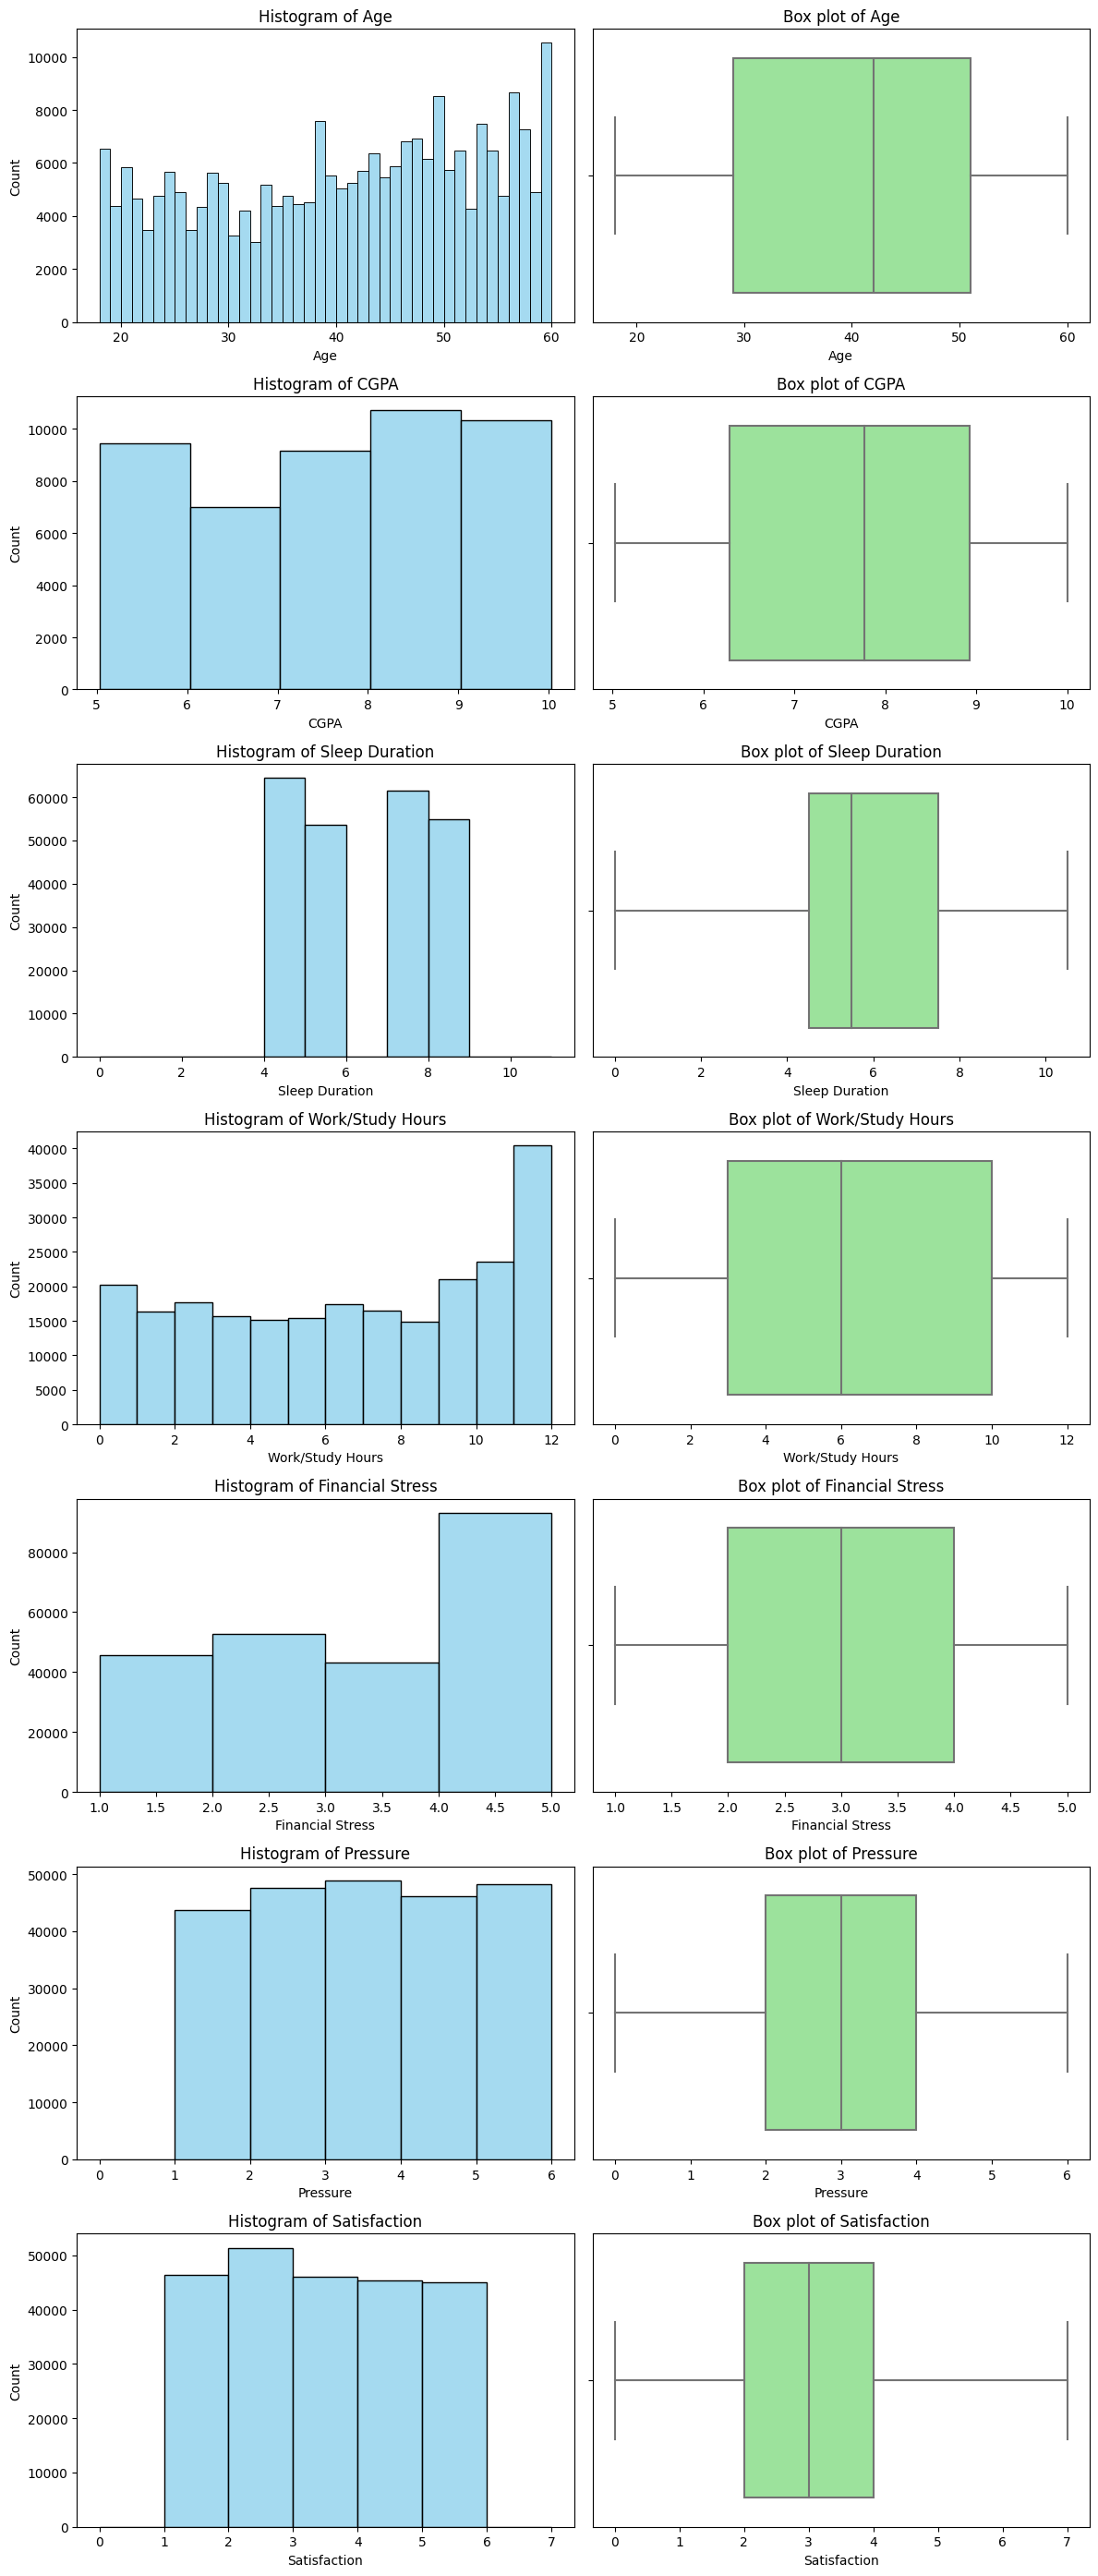

In [20]:
# Filter numerical columns
col_to_exclude = ["id", "Depression"]
numerical_cols = [col for col in numerical_columns if col not in col_to_exclude]

# Set up the figure
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols):
    # Plot histogram
    sns.histplot(df[col], ax=axes[i, 0], color='skyblue', binwidth=1)
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Plot boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

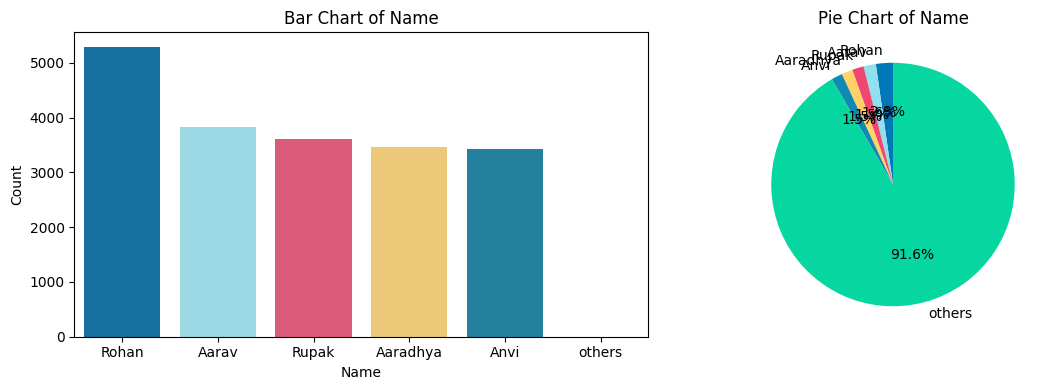

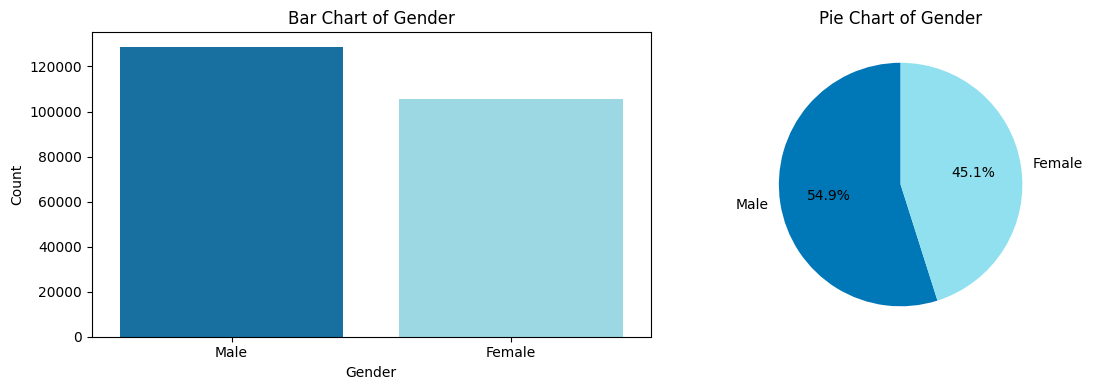

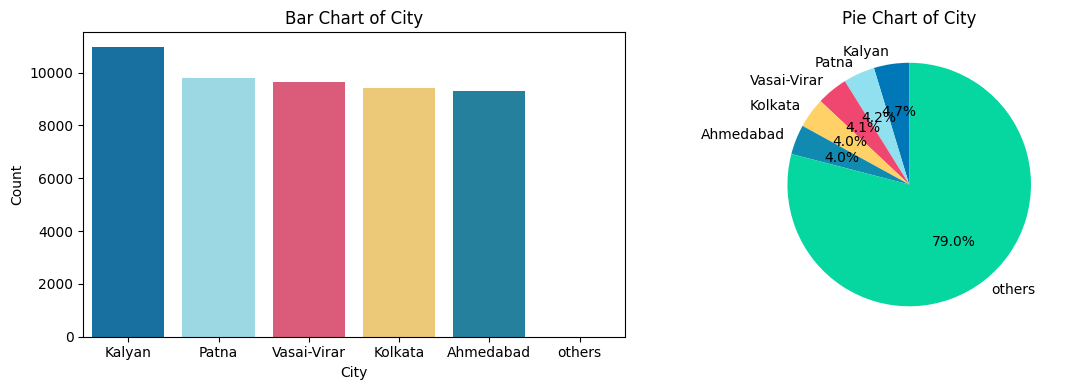

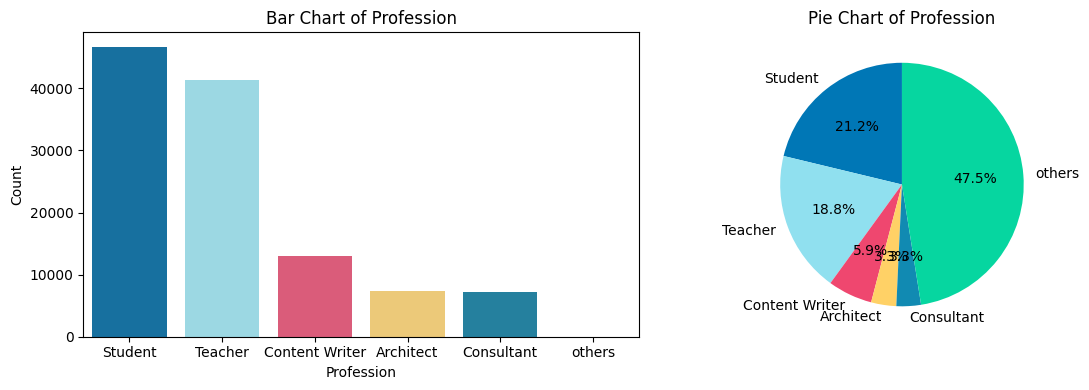

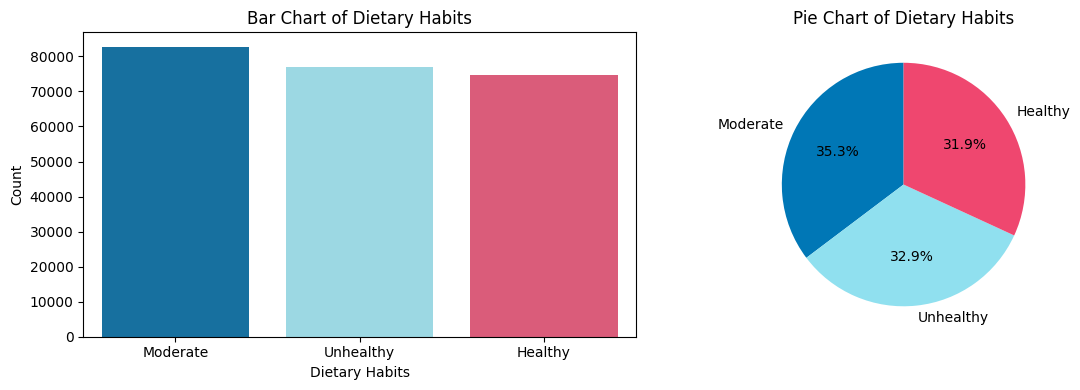

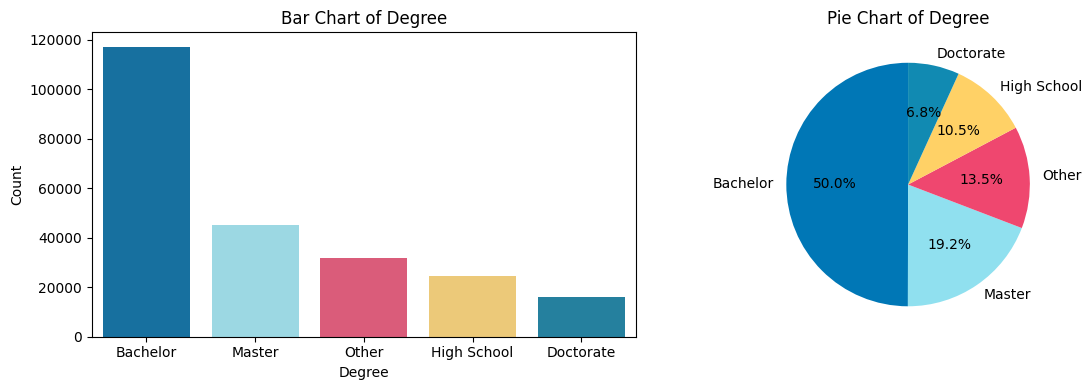

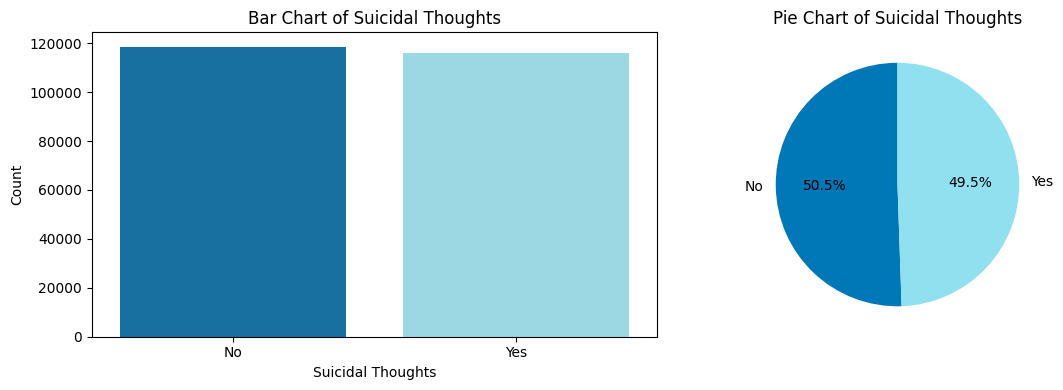

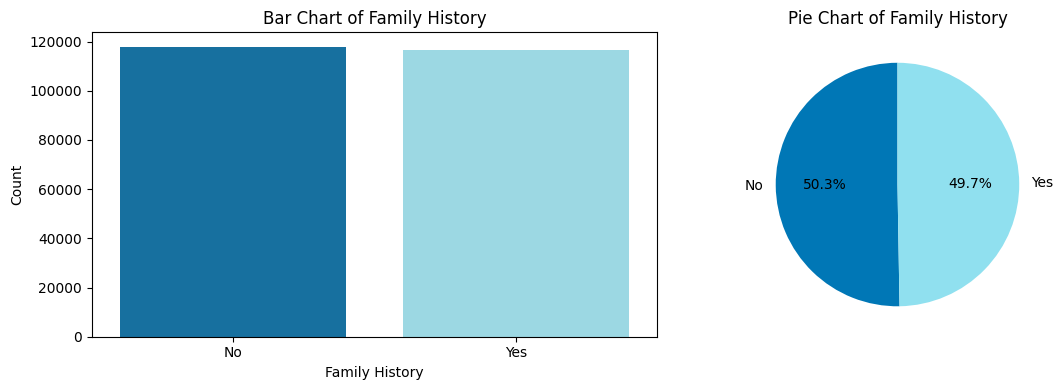

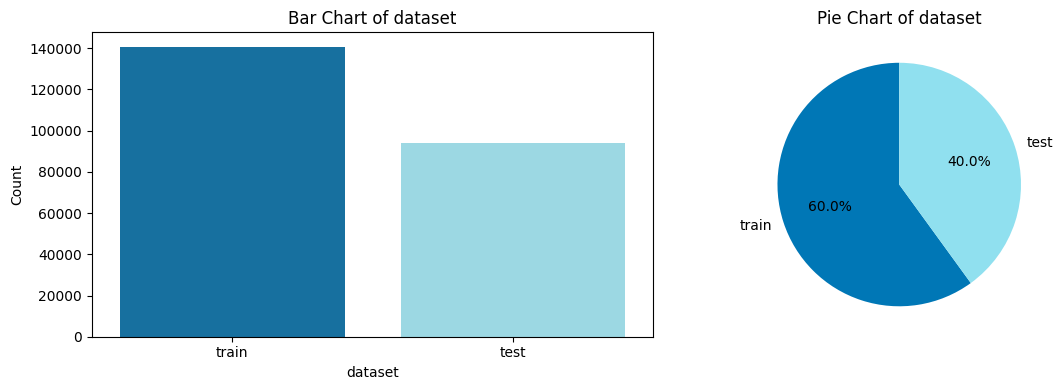

In [21]:
categorical_cols = categorical_columns

# Plotting distribution of each categorical column in a bar chart and pie chart
for col in categorical_cols:
    # Get the value counts and select top 7 categories
    value_counts = df[col].value_counts()
    
    # Group other categories as "others"
    if len(value_counts) > 7:
        top_categories = value_counts.head(5)
        others_count = value_counts.iloc[5:].sum()
        # Concatenate top categories with the "others" category
        value_counts = pd.concat([top_categories, pd.Series({"others": others_count})])

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Bar chart
    sns.countplot(data=df[df[col].isin(value_counts.index)], x=col, ax=axs[0], order=value_counts.index)
    axs[0].set_title(f'Bar Chart of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Count')

    # Pie chart
    axs[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axs[1].set_title(f'Pie Chart of {col}')

    plt.tight_layout()
    plt.show()

## Relationship between Depression and each column

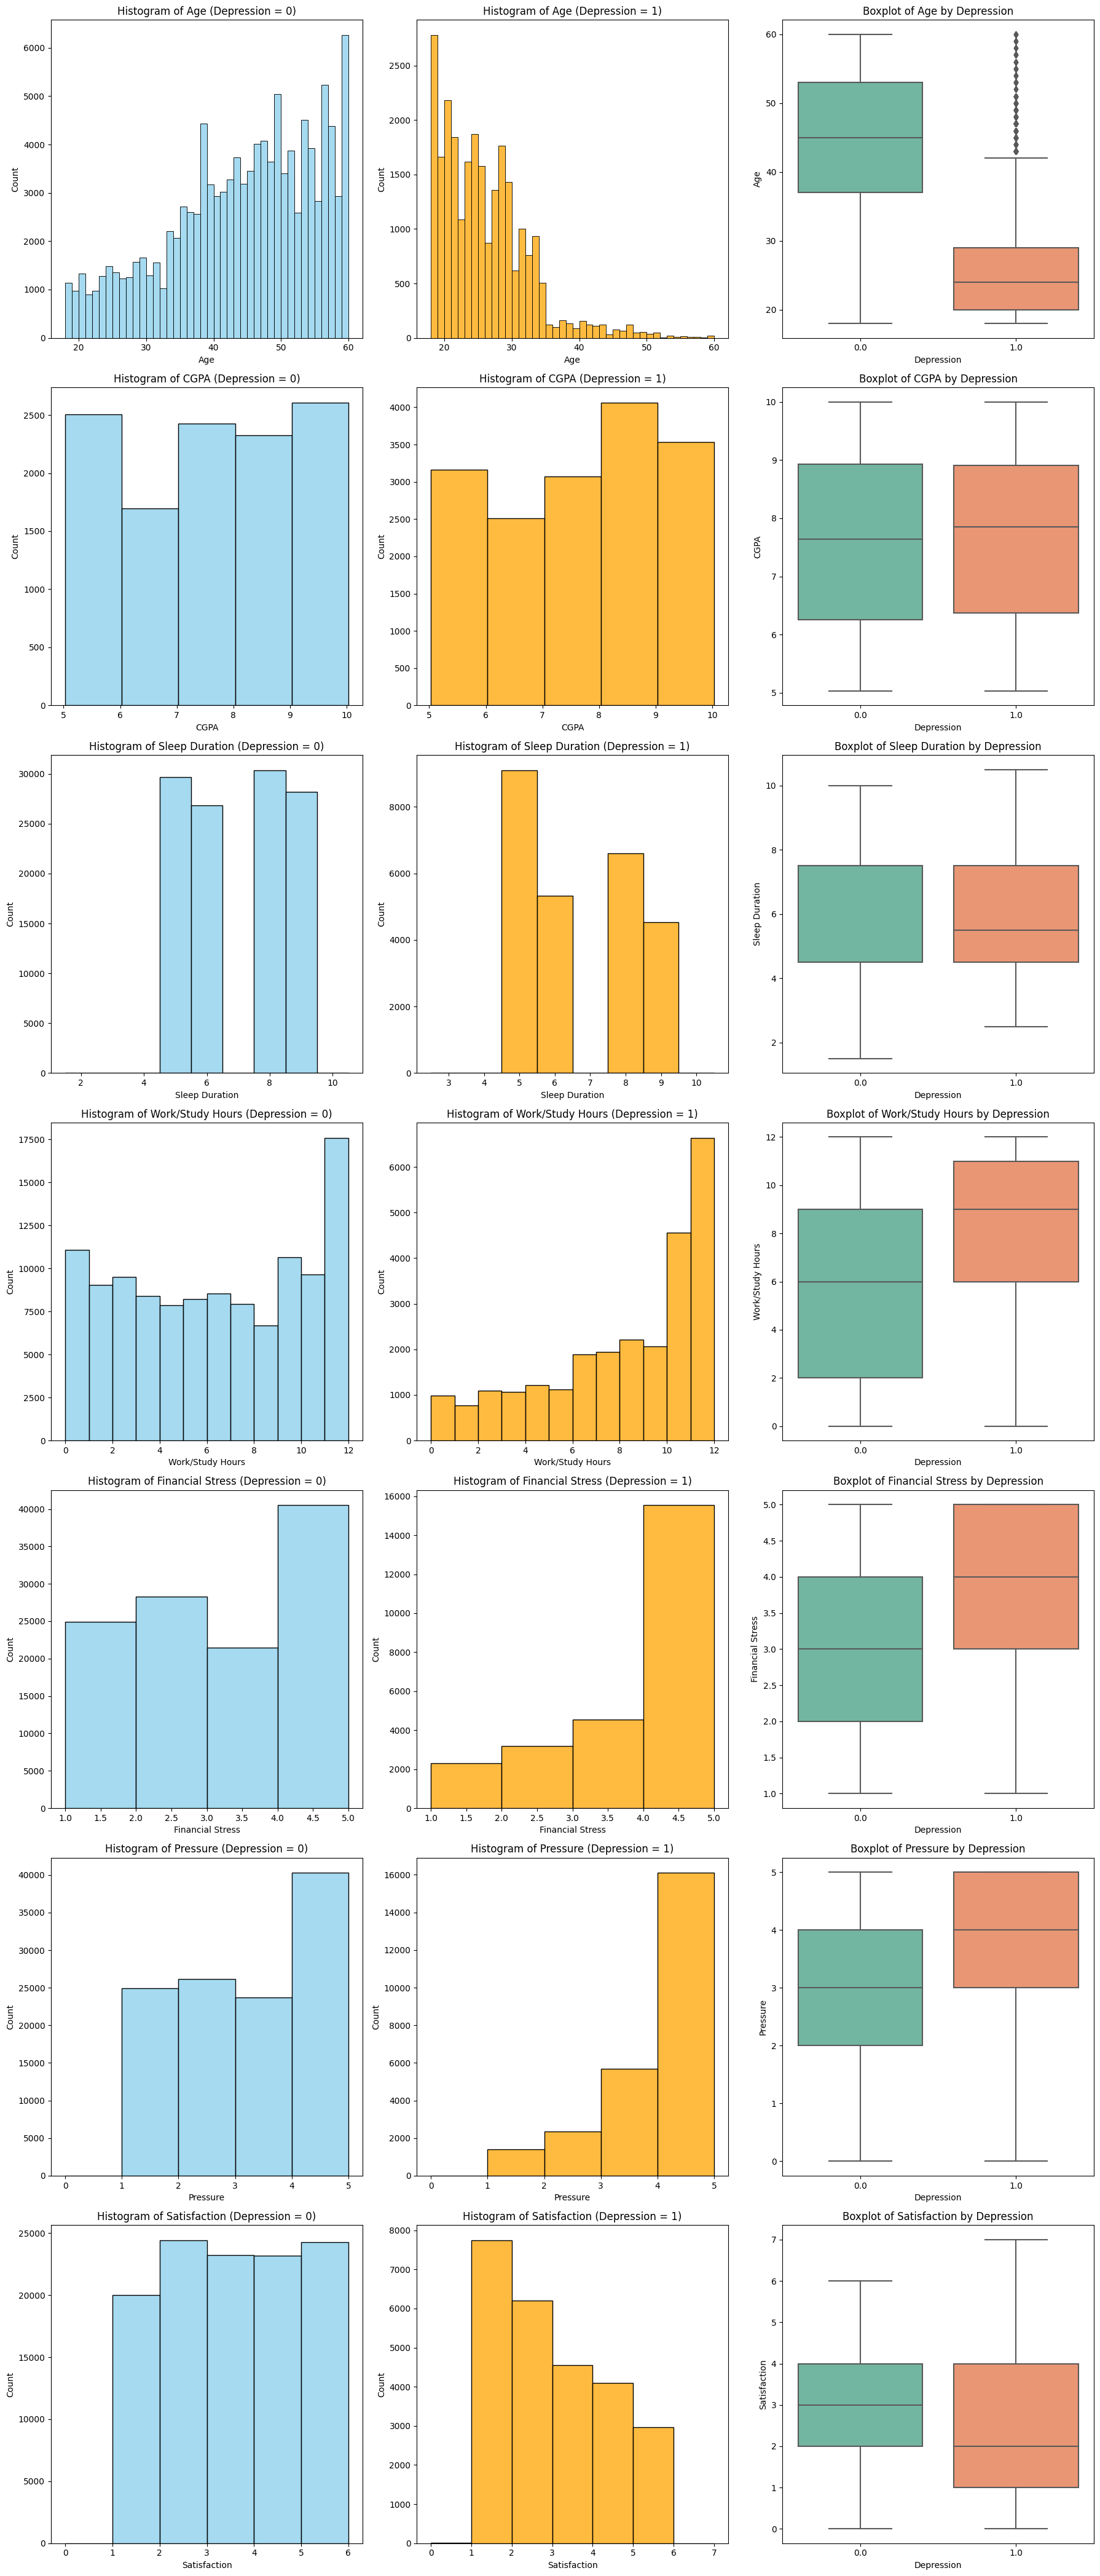

In [22]:
# Relationship between Depression and nummerical attributes

# Set up the figure
fig, axes = plt.subplots(len(numerical_cols), 3, figsize=(18, len(numerical_cols) * 6))

# Iterate through numerical columns
for i, col in enumerate(numerical_cols):
    # Histogram for Depression = 0
    sns.histplot(
        df[df["Depression"] == 0][col], 
        ax=axes[i, 0], 
        color='skyblue', 
        binwidth=1
    )
    axes[i, 0].set_title(f'Histogram of {col} (Depression = 0)')
    
    # Histogram for Depression = 1
    sns.histplot(
        df[df["Depression"] == 1][col], 
        ax=axes[i, 1], 
        color='orange', 
        binwidth=1
    )
    axes[i, 1].set_title(f'Histogram of {col} (Depression = 1)')
    
    # Boxplot by Depression
    sns.boxplot(x="Depression", y=col, data=df, ax=axes[i, 2], palette="Set2")
    axes[i, 2].set_title(f'Boxplot of {col} by Depression')

# Adjust layout
plt.tight_layout()
plt.show()


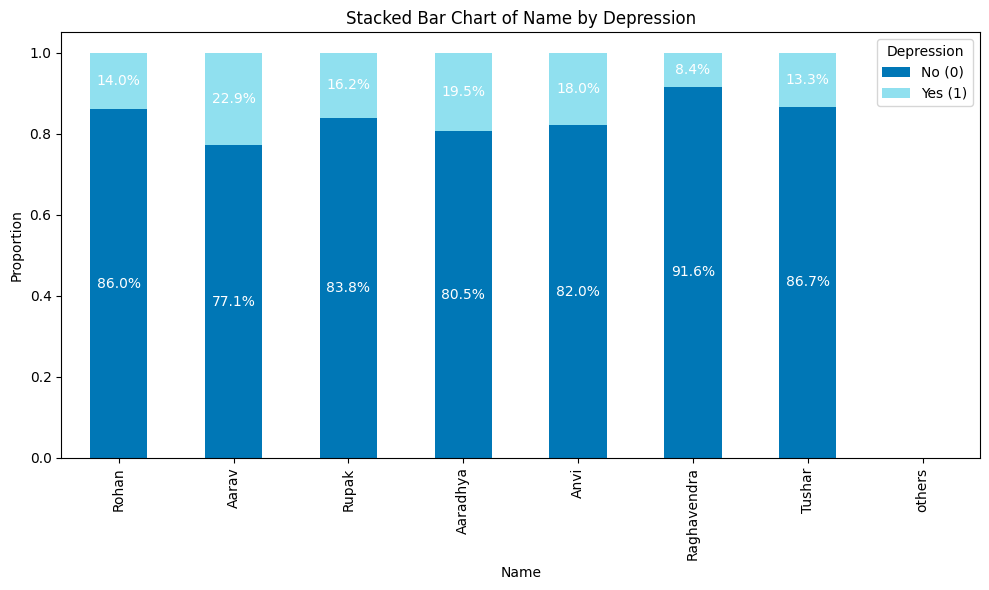

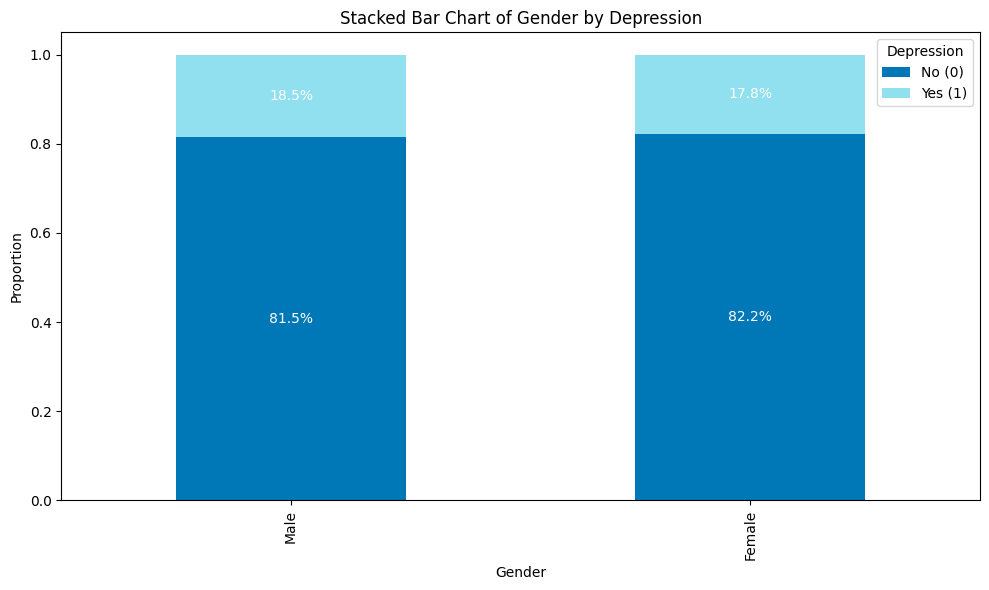

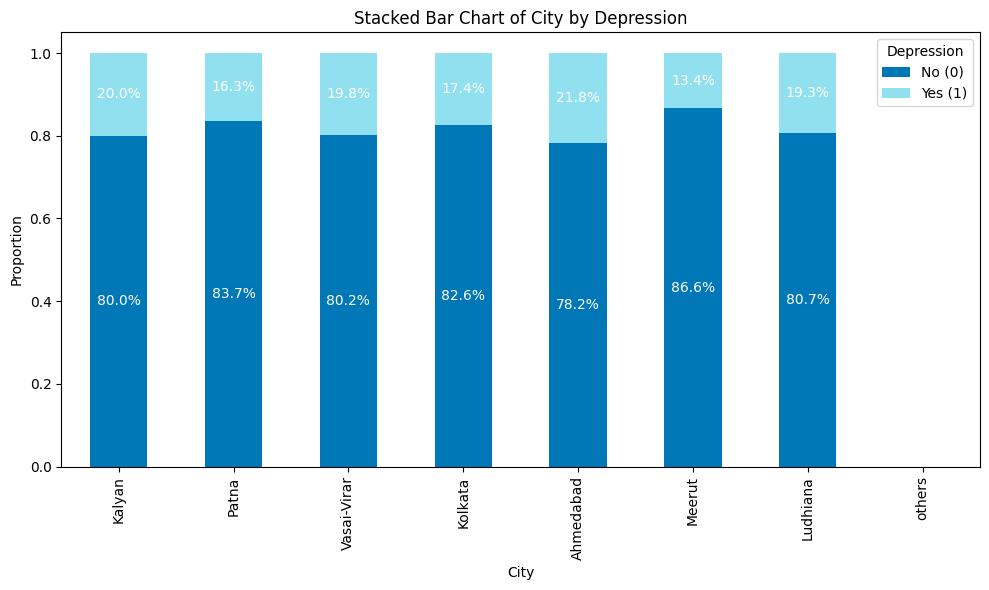

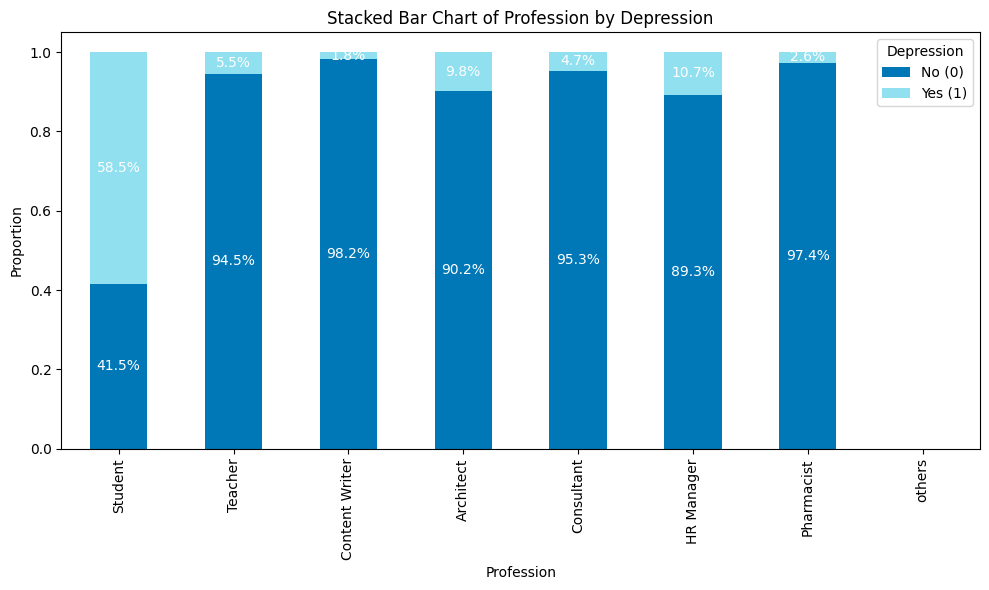

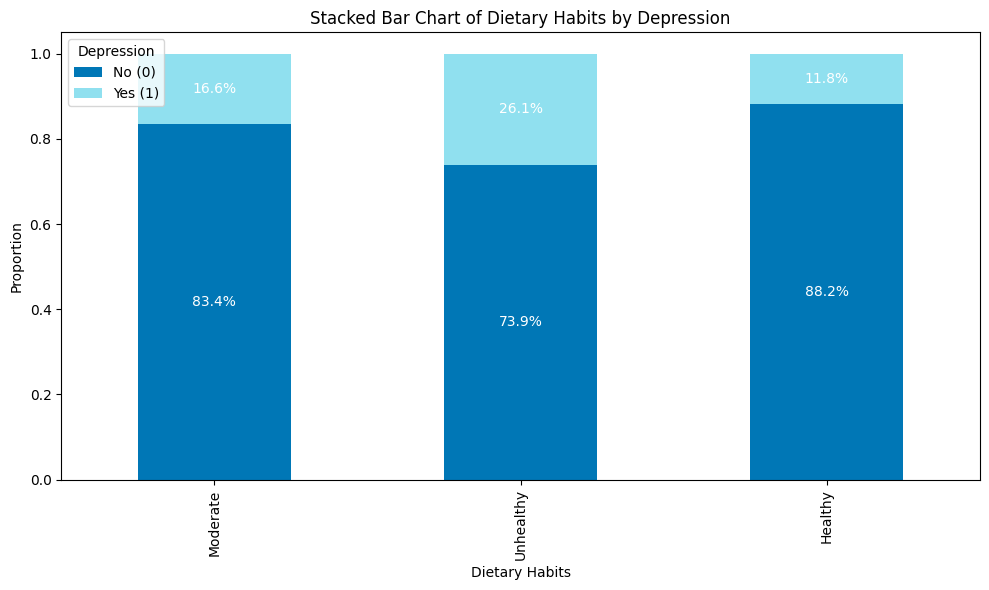

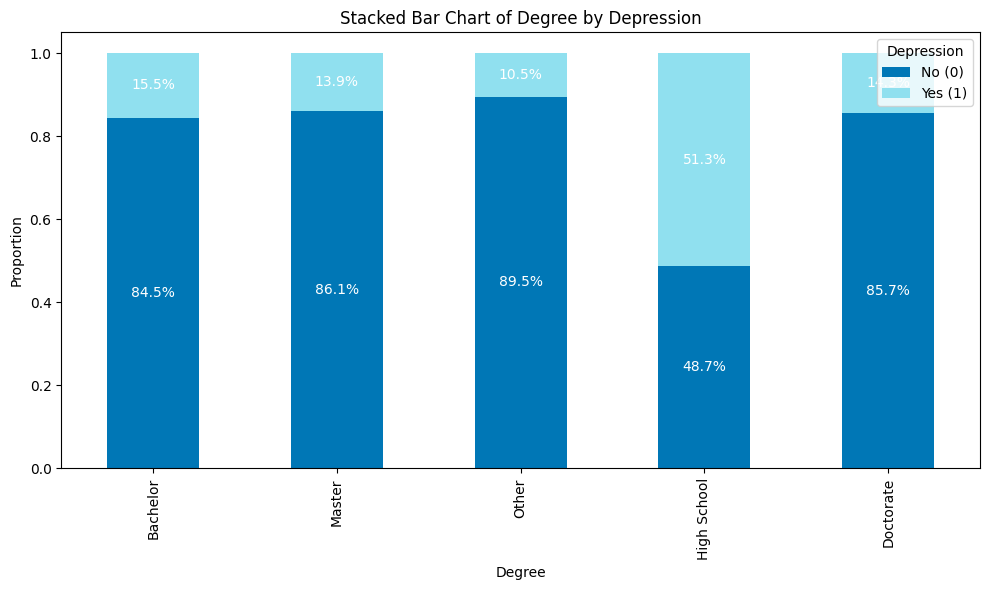

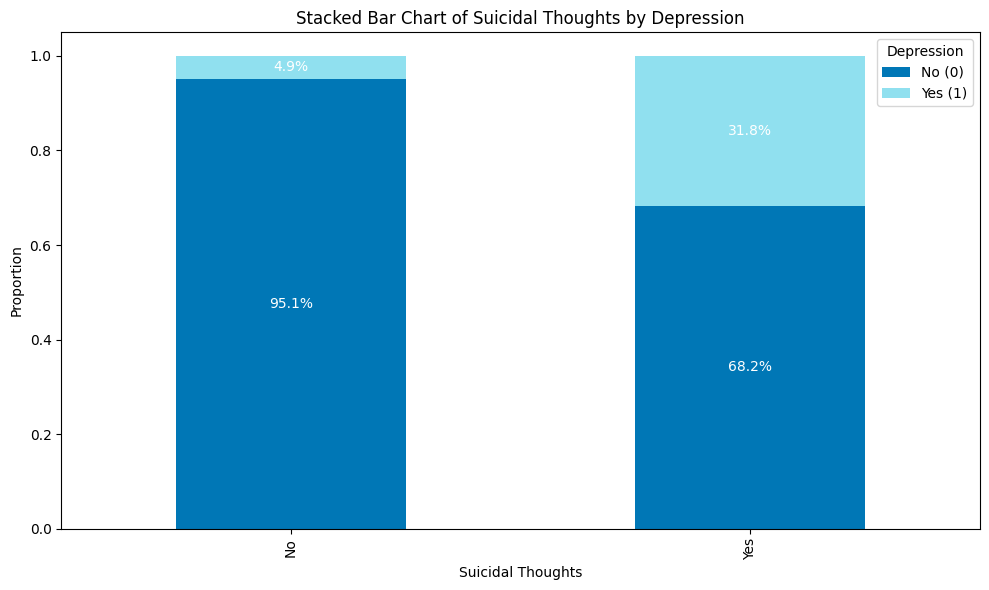

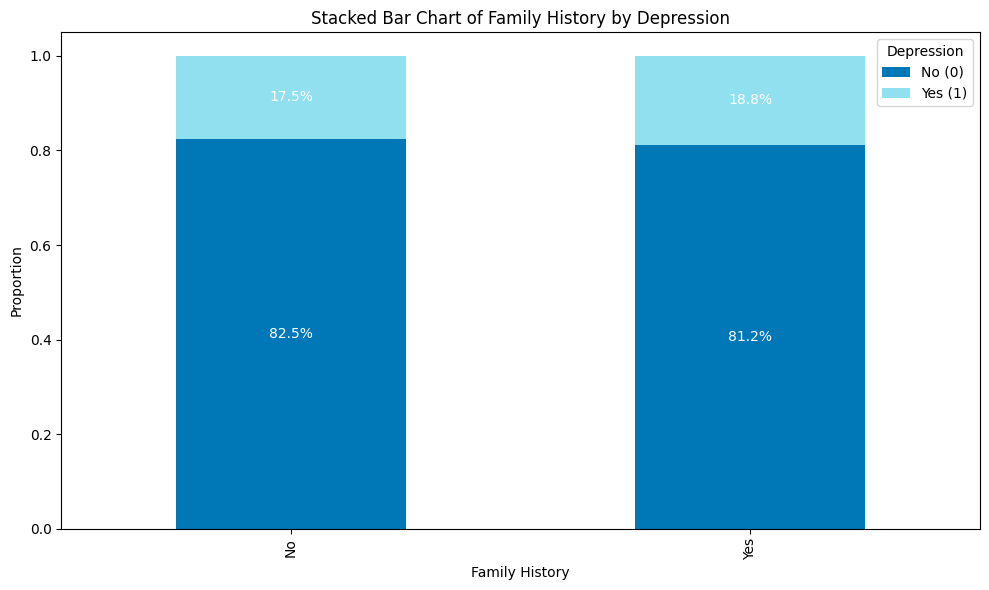

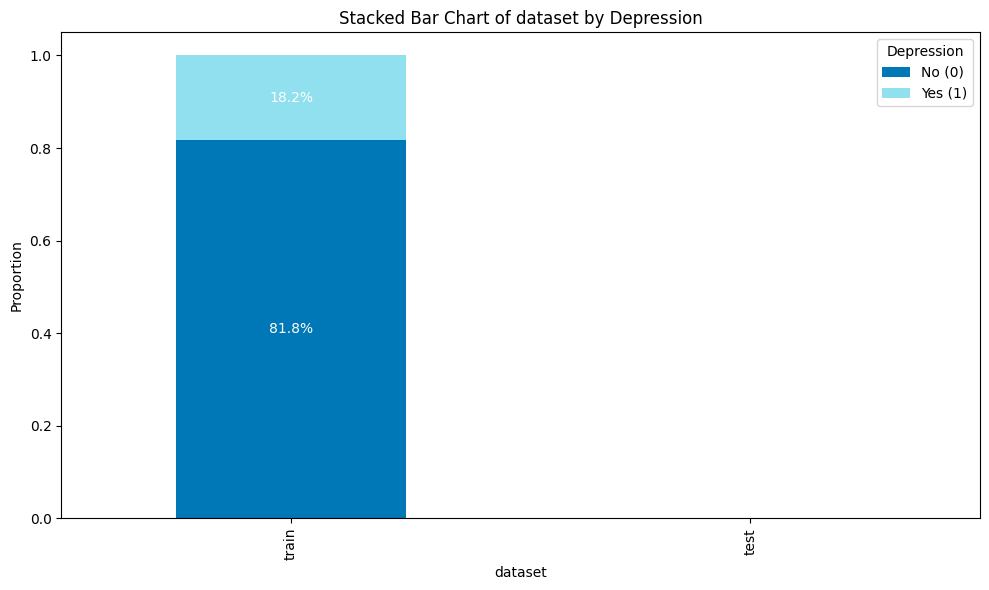

In [23]:
# Relationship between Depression and categorical attributes

# Plotting distribution of each categorical column in a bar chart
for col in categorical_cols:
    # Get the value counts and select top 7 categories
    value_counts = df[col].value_counts()
    
    # Group other categories as "others"
    if len(value_counts) > 7:
        top_categories = value_counts.head(7)
        others_count = value_counts.iloc[7:].sum()
        # Concatenate top categories with the "others" category
        value_counts = pd.concat([top_categories, pd.Series({"others": others_count})])
    
    # Filter data for top categories including "others"
    filtered_df = df[df[col].isin(value_counts.index)]
    
    # Cross-tabulation for stacked bar chart
    stacked_data = pd.crosstab(filtered_df[col], filtered_df["Depression"], normalize='index')
    stacked_data = stacked_data.reindex(value_counts.index)  # Ensure consistent order
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Stacked Bar Chart of {col} by Depression')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    ax.legend(title="Depression", labels=['No (0)', 'Yes (1)'])

    # Add data labels showing the share of depression for each category
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        if height > 0:  # Only add label for positive heights
            share = height * 100  # Percentage within the category
            ax.annotate(f'{share:.1f}%', (x, y), color='white', ha='center', va='center')

    plt.tight_layout()
    plt.show()

## Overal distribution of depression

,Count,Average Age,Average Work/Study Hours
Depression_En,,,
No,115133,43.68,5.90
Yes,25567,25.55,7.82


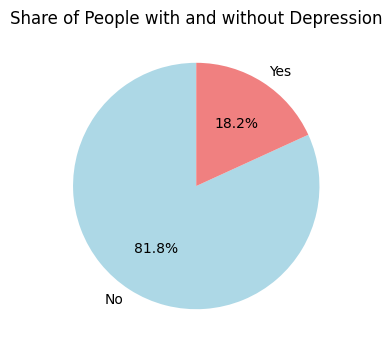

In [24]:
# 1. Replace 0 and 1 with "No" and "Yes"
df["Depression_En"] = df["Depression"].replace({0: "No", 1: "Yes"})

# 2. Group and aggregate data with 2 decimal points
summary = (
    df.groupby("Depression_En")
    .agg({"id": "count", 
          "Age": "mean", 
          "Work/Study Hours": "mean"})
    .rename(columns={"id": "Count", 
                     "Age": "Average Age", 
                     "Work/Study Hours": "Average Work/Study Hours"})
    .round(2))

display(summary)

# 3. Plot pie chart
pie_data = df["Depression_En"].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(pie_data, 
        labels=pie_data.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["lightblue", "lightcoral"])
plt.title("Share of People with and without Depression")
plt.show()

df.drop(["Depression_En"], axis=1, inplace = True)

## A Closer Look at the Effect of Profession and Degree

In [25]:
# Defining a function to plot a treemap

def plot_treemap(df, column_name):
    # Calculate frequencies for the given column
    value_counts = df[column_name].value_counts()
    
    # Limit to the top 15 values for readability
    sizes = value_counts.values[:15]
    labels = value_counts.index[:15]
    
    # Set a color palette for the treemap (you can adjust the colors here)
    colors = plt.cm.Paired(range(7))
    
    # Create and display the treemap
    plt.figure(figsize=(12, 6))
    squarify.plot(sizes=sizes, 
                  label=labels, 
                  color=colors, 
                  pad=True)
    
    # Set title and remove axis
    plt.title(f"Treemap of {column_name} (Top 15)")
    plt.axis("off")
    
    # Show the plot
    plt.show()

In [26]:
# Defining a function to plot a Sankey chart

def plot_sankey(df, column1, column2, top_n=20):
    # Get the top N categories from the first column
    column1_counts = df[column1].value_counts().nlargest(top_n)
    filtered_data = df[df[column1].isin(column1_counts.index)]
    
    # Create a summary DataFrame
    sankey_data = filtered_data.groupby([column1, column2]).size().reset_index(name='Count')
    
    # Define the source and target for the Sankey chart
    labels = list(sankey_data[column1].unique()) + [f'No {column2}', f'{column2}']
    source_indices = []
    target_indices = []

    for _, row in sankey_data.iterrows():
        column1_index = labels.index(row[column1])
        column2_index = labels.index(f'{column2}' if row[column2] == 1 else f'No {column2}')
        source_indices.append(column1_index)
        target_indices.append(column2_index)

    # Create a Sankey chart
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color='blue'
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=sankey_data['Count']
        )
    )])

    # Update the layout and show the chart
    fig.update_layout(
        title_text=f"Sankey Diagram of {column1} and {column2}", 
        font_size=10,
        width=700, 
        height=600
    )
    
    # render the figure
    fig.show()


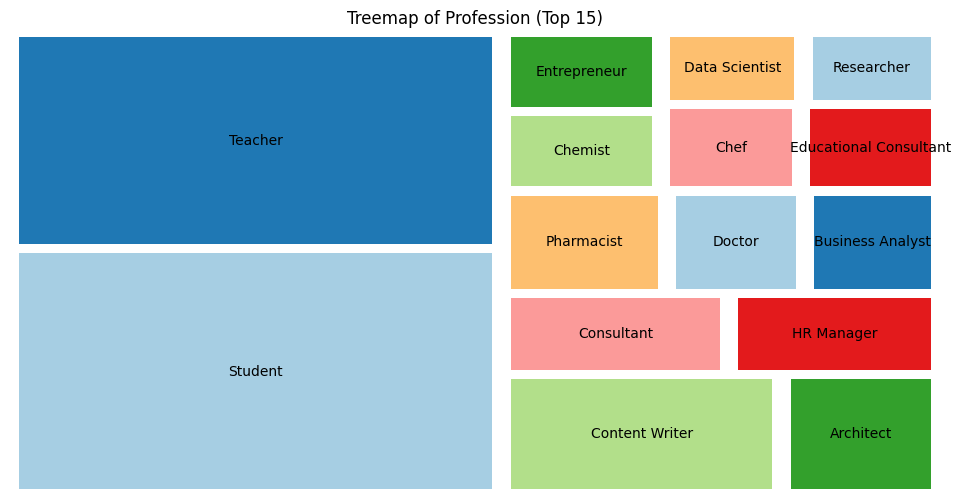

In [27]:
plot_treemap(df, 'Profession')

plot_sankey(df, 'Profession', 'Depression')

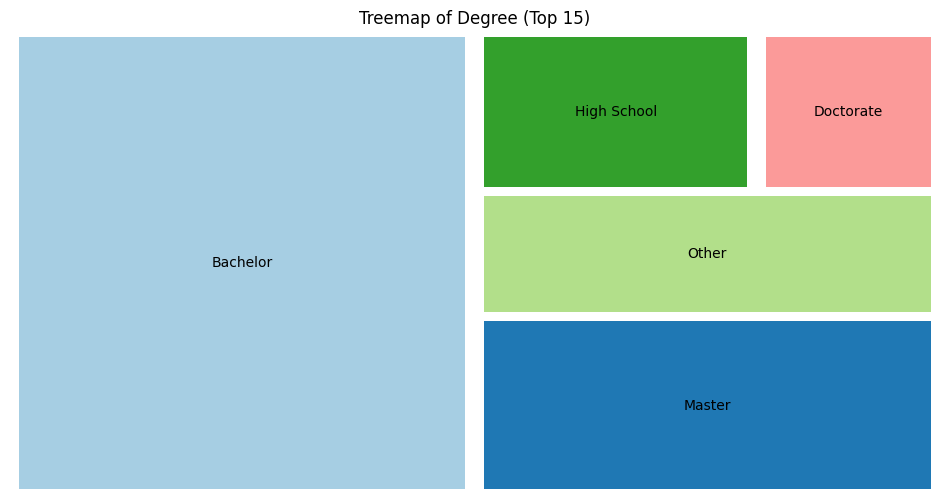

In [28]:
plot_treemap(df, 'Degree')

plot_sankey(df, 'Degree', 'Depression')

## Correlation

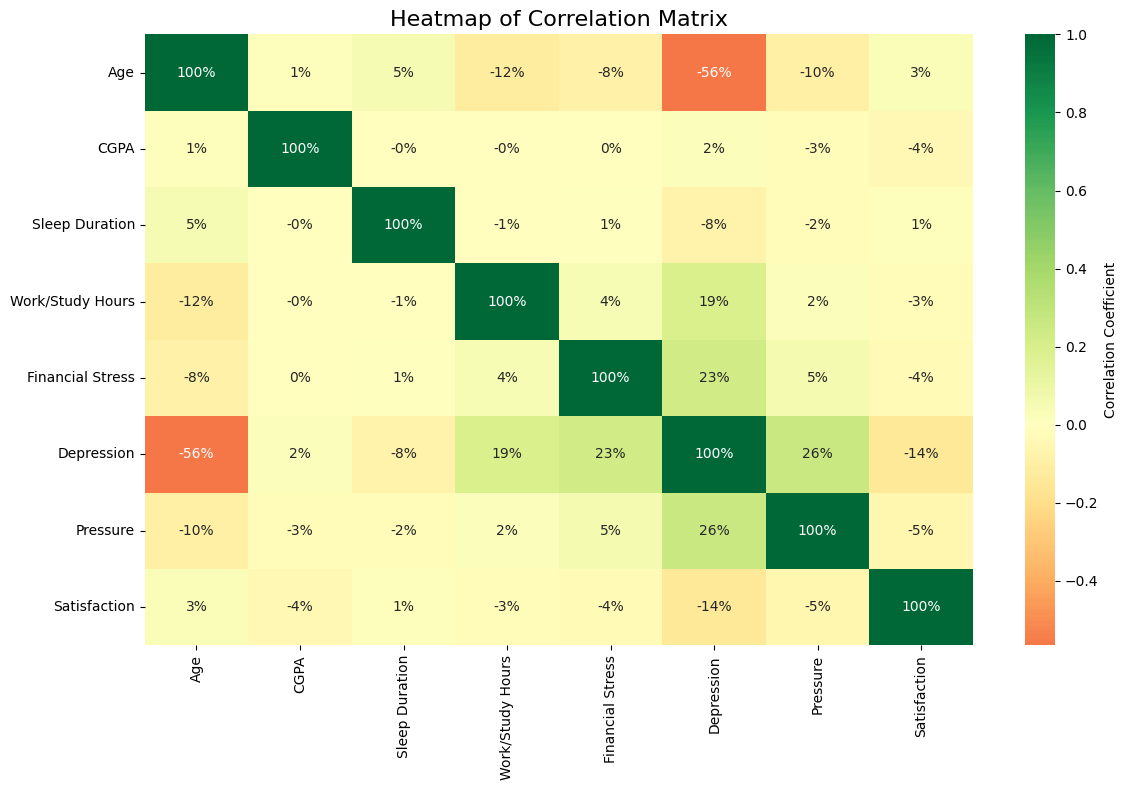

In [29]:
# Exclude the 'id' column and calculate the correlation matrix
correlation_matrix = df.drop(columns=['id']).corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap with green and red colors
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".0%",
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Correlation Coefficient'})

# Add a title
plt.title('Heatmap of Correlation Matrix', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything cleanly
plt.show()

## Relationship between each two columns and depression

In [30]:
def plot_depression_relationship(df, col1, col2, target_col='Depression'):
    """
    This function takes in a dataframe and two columns, 
    then plots their relationship with the target column ('Depression')
    """
    # Drop rows with NaN values in the specified columns and target column
    df_copy = df.dropna(subset=[col1, col2, target_col])

    # Create bins for the selected columns
    df_copy[f'{col1}_bin'] = pd.cut(df_copy[col1], bins=5).astype(str)
    df_copy[f'{col2}_bin'] = pd.cut(df_copy[col2], bins=5).astype(str)

    # Create a pivot table with the bins and the target column
    heatmap_data = df_copy.pivot_table(index=f'{col1}_bin', 
                                       columns=f'{col2}_bin', 
                                       values=target_col, 
                                       aggfunc='mean')

    # Create a heatmap using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, 
                annot=True, 
                cmap='Reds', 
                cbar_kws={'label': target_col}, 
                fmt='.2f')

    # Set plot labels and title
    plt.title(f'Heatmap of {target_col} by {col1} and {col2}')
    plt.xlabel(f'{col2} Bin')
    plt.ylabel(f'{col1} Bin')

    # Show the plot
    plt.show()

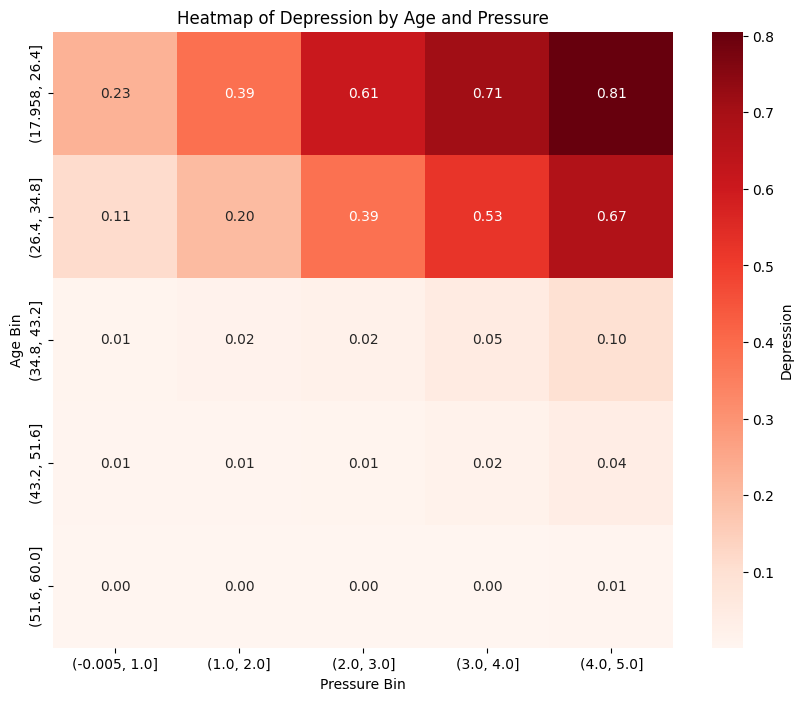

In [31]:
plot_depression_relationship(df, 'Age', 'Pressure', 'Depression')

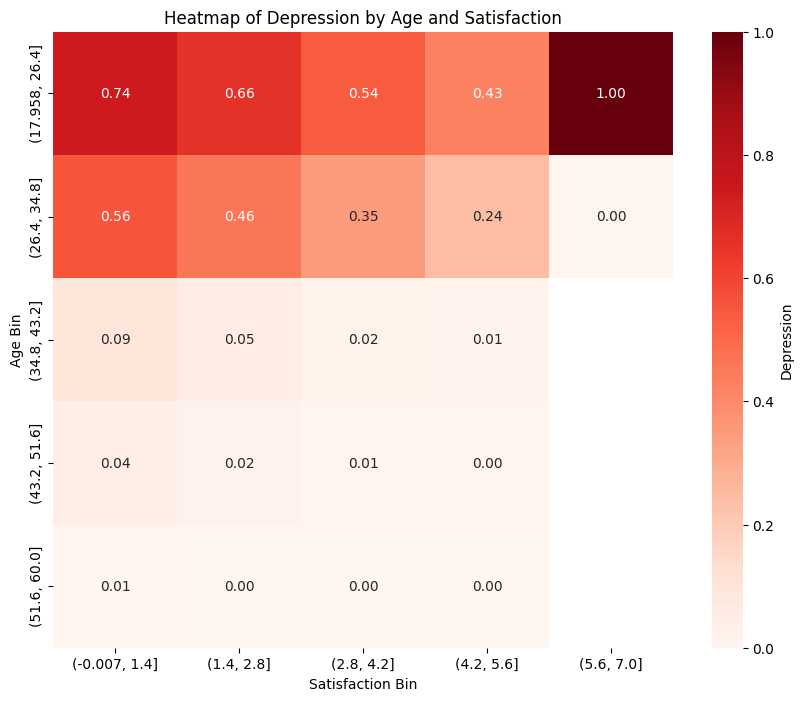

In [32]:
plot_depression_relationship(df, 'Age', 'Satisfaction', 'Depression')

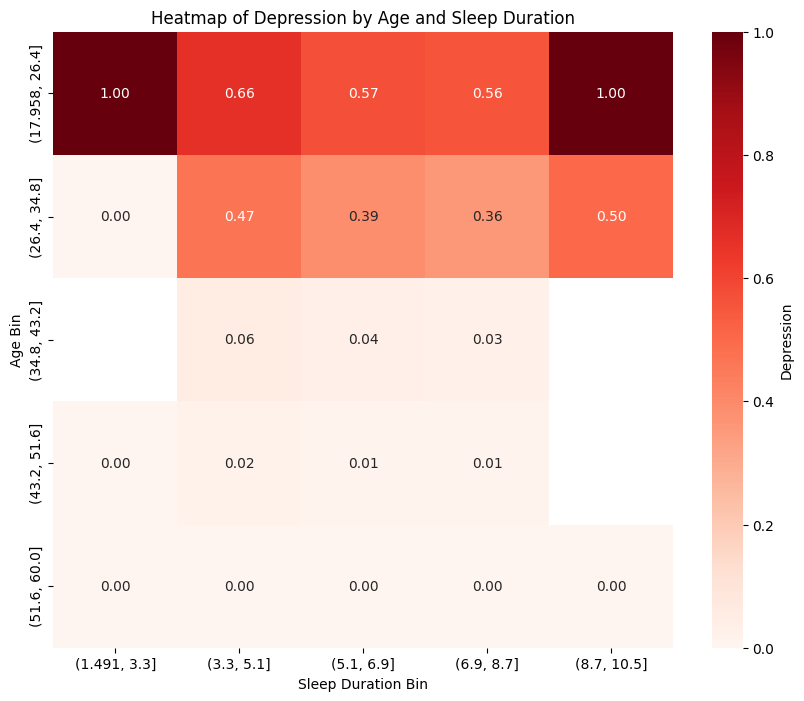

In [33]:
plot_depression_relationship(df, 'Age', 'Sleep Duration', 'Depression')

# Modelling

## Feature Engneering

In [34]:
# Apply Target Encoding to categorical features

# Define column names
initial_cols = ['Name', 'City', 'Profession']
encoded_cols = ['Name_encoded', 'City_encoded', 'Profession_encoded']

# Initialize TargetEncoder
encoder = TargetEncoder(cols=initial_cols)

# Apply encoding to the train dataset
train_indices = df['dataset'] == 'train'
df.loc[train_indices, encoded_cols] = encoder.fit_transform(
    df.loc[train_indices, initial_cols],
    df.loc[train_indices, target_column]).values

# Apply encoding to the test dataset
test_indices = df['dataset'] == 'test'
df.loc[test_indices, encoded_cols] = encoder.transform(
    df.loc[test_indices, initial_cols]).values

In [35]:
# Adding average salaries (using ChatGPT)
average_salaries = {
    'Chef': 300000,
    'Teacher': 400000,
    'Student': 0,
    'Business Analyst': 800000,
    'Financial Analyst': 900000,
    'Chemist': 500000,
    'Electrician': 250000,
    'Software Engineer': 1200000,
    'Data Scientist': 1500000,
    'Plumber': 200000,
    'Marketing Manager': 1000000,
    'Accountant': 600000,
    'Entrepreneur': 1000000,
    'HR Manager': 800000,
    'UX/UI Designer': 700000,
    'Content Writer': 400000,
    'Educational Consultant': 600000,
    'Civil Engineer': 500000,
    'Manager': 1000000,
    'Pharmacist': 400000,
    'Architect': 700000,
    'Mechanical Engineer': 500000,
    'Customer Support': 300000,
    'Consultant': 1200000,
    'Judge': 2500000,
    'Researcher': 700000,
    'Pilot': 1800000,
    'Graphic Designer': 400000,
    'Travel Consultant': 350000,
    'Digital Marketer': 600000,
    'Lawyer': 1200000,
    'Research Analyst': 800000,
    'Sales Executive': 300000,
    'Doctor': 1500000,
    'Unemployed': 0,
    'Investment Banker': 2000000,
    'Other': 500000,
    'Academic': 400000,
    'Working Professional': 800000
}

# Add a new column with average salaries
df['Average_Salary'] = df['Profession'].map(average_salaries)


In [36]:
# Categorizing the jobs as "Office-based desk job" or not (using chatgpt)
job_categories = {
    'Chef': False,
    'Teacher': False,
    'Student': False,
    'Business Analyst': True,
    'Financial Analyst': True,
    'Chemist': False,
    'Electrician': False,
    'Software Engineer': True,
    'Data Scientist': True,
    'Plumber': False,
    'Marketing Manager': True,
    'Accountant': True,
    'Entrepreneur': False,  # Can vary based on the business
    'HR Manager': True,
    'UX/UI Designer': True,
    'Content Writer': True,
    'nan': False,
    'Educational Consultant': True,  # Can vary depending on context
    'Civil Engineer': False,
    'Manager': True,
    'Pharmacist': False,
    'Architect': True,  # Can involve site visits
    'Mechanical Engineer': False,
    'Customer Support': True,
    'Consultant': True,  # Can vary based on field
    'Judge': False,
    'Researcher': True,  # Often desk-based but can involve labs or fieldwork
    'Pilot': False,
    'Graphic Designer': True,
    'Travel Consultant': True,
    'Digital Marketer': True,
    'Lawyer': True,
    'Research Analyst': True,
    'Sales Executive': False,  # Often involves fieldwork
    'Doctor': False,
    'Unemployed': False,
    'Investment Banker': True,
    'Other': False,
    'Academic': True,  # Can involve classrooms and labs
    'Working Professional': False  # Too broad to classify
}

# Add a new column with job categories
df['Desk_Based'] = df['Profession'].map(job_categories)


In [37]:
# Creating new features based on existing columns
df["income_by_age"] = df["Average_Salary"] / df["Age"]
df["fin_stress_by_age"] = df["Financial Stress"] / df["Age"]

# Calculating Sleep Efficiency
df['sleep_efficiency'] = df["Work/Study Hours"] / df["Sleep Duration"]

# Calculating stress level
df["stress"] = df["Work/Study Hours"] / df["Satisfaction"] / df["Sleep Duration"]

# Calculating hourly salary and grade per effort
df["hourly_salary"] = df["Average_Salary"] / df["Work/Study Hours"]
df["grade_per_effort"] = df["CGPA"] / df["Work/Study Hours"]

# Ensuring that grade per effort is non-negative
df["grade_per_effort"] = df["grade_per_effort"].apply(lambda x: max(x, 0))

# Calculating the mean values for depression, salary, and pressure by city
city_depression_mean = df.groupby('City')['Depression'].mean()
df['city_depression'] = df['City'].map(city_depression_mean)

city_salary_mean = df.groupby('City')['Average_Salary'].mean()
df['city_salary'] = df['City'].map(city_salary_mean)

city_work_pressure_mean = df.groupby('City')['Pressure'].mean()
df['city_pressure'] = df['City'].map(city_work_pressure_mean)

# Calculating the mean values for pressure and satisfaction by profession
prof_pressure_mean = df.groupby('Profession')['Pressure'].mean()
df['prof_pressure'] = df['Profession'].map(prof_pressure_mean)

prof_satis_mean = df.groupby('Profession')['Satisfaction'].mean()
df['prof_satis'] = df['Profession'].map(prof_satis_mean)

# Calculating the mean depression by name
name_depression_mean = df.groupby('Name')['Depression'].mean()
df['name_depression'] = df['Name'].map(name_depression_mean)

In [38]:
# Remove redundant columns from the DataFrame
columns_to_drop = ["Name", "City", "Profession"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Apply one-hot encoding to categorical columns, excluding the first category to avoid multicollinearity
table_data, numerical_columns, categorical_columns = analyze_column_types(df)
df = pd.get_dummies(df, columns=categorical_columns, dtype=int, drop_first=True)

# Handle infinite values by replacing them with NaN and impute missing values using the median strategy
df.replace([np.inf, -np.inf], np.nan, inplace=True)
inf_imputer = SimpleImputer(strategy='median')
df[df.columns] = inf_imputer.fit_transform(df)


## Train | Test Split

In [39]:
# Separate features and target variable
train_indices = df['dataset_train'] == True
X_train = df[train_indices].drop(columns=['Depression', 'dataset_train'])
X_test = df[~train_indices].drop(columns=['Depression', 'dataset_train'])
y = df.loc[train_indices, 'Depression']

# train and validation split for the models
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.075, random_state=rs)

## XGBoost

In [40]:
# Hyperparameter optimization of the XGBoost classifier using Optuna
def objective(trial):

    # Define the hyperparameter space to be searched
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),  # Number of boosting rounds (trees)
        'max_depth': trial.suggest_int('max_depth', 2, 10),  # Maximum depth of the decision trees
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),  # Step size shrinking to improve model generalization
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Fraction of samples used for training each tree
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.9),  # Fraction of features used for building each tree
        'gamma': trial.suggest_float('gamma', 0, 5),  # Minimum loss reduction required to make a further partition
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),  # L1 regularization on weights
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),  # L2 regularization on weights
        'random_state': rs,  # Random state for reproducibility
        'use_label_encoder': False,  # Prevent label encoding warnings (deprecated feature in XGBoost)
        'eval_metric': 'logloss',  # Evaluation metric (logarithmic loss for binary classification)
        'objective': 'binary:logistic',  # Objective function for binary classification
    }

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    # Returns The accuracy of the XGBoost model on the validation set.
    return accuracy

# Create the Optuna study to maximize the objective function
study = optuna.create_study(direction='maximize')

# Run the optimization process with a specified number of trials
study.optimize(objective, n_trials=N_TRIALS)

# Retrieve the best hyperparameters and model performance
best_xgb_params = study.best_params

# Print the best trial details
print("Best trial:")
best_trial = study.best_trial
print(f"Value: {best_trial.value}")
print("Best Params:")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")


Best trial:
Value: 0.9403013361129536
Best Params:
n_estimators: 885
max_depth: 2
learning_rate: 0.13478754391095954
subsample: 0.6731633063040356
colsample_bytree: 0.714020611794496
gamma: 2.66231591888768
reg_alpha: 0.0071434710022246686
reg_lambda: 0.017268444839907422


## CatBoost

In [41]:
# Hyperparameter optimization of the CatBoost classifier using Optuna
def objective(trial):

    # Define hyperparameter search space for CatBoost model
    params = {
        'iterations': trial.suggest_int('iterations', 100, 2000),  # Number of boosting iterations
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),  # Learning rate, sampled on a logarithmic scale
        'depth': trial.suggest_int('depth', 3, 12),  # Maximum depth of the trees
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),  # L2 regularization coefficient for leaf nodes
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),  # Controls randomness in bagging
        'random_strength': trial.suggest_float('random_strength', 0, 1),  # Controls randomness in model training
        'border_count': trial.suggest_int('border_count', 32, 255),  # The number of splits in the data
        'loss_function': 'Logloss',  # Loss function to optimize (binary classification)
        'eval_metric': 'Accuracy',  # Metric to monitor during training
        'logging_level': 'Silent',  # Suppress logs for cleaner output
        'random_seed': 42,  # Random seed for reproducibility
    }
    
    # Initialize and train the CatBoostClassifier with suggested parameters
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)

    # Predict on validation data and calculate accuracy
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy  # Return accuracy for optimization

# Run the Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=N_TRIALS)

# Print best parameters and accuracy
best_catb_params = study.best_params
print("Best parameters:", best_catb_params)
print("Best accuracy:", study.best_value)


Best parameters: {'iterations': 320, 'learning_rate': 0.17747515876673362, 'depth': 9, 'l2_leaf_reg': 8.283393227511192, 'bagging_temperature': 0.8994973048994407, 'random_strength': 0.0779701007842496, 'border_count': 157}
Best accuracy: 0.9413436937363783


## LightGBM

In [42]:
# Define the objective function for hyperparameter optimization
def objective(trial):
    
    # Suggest hyperparameters using Optuna's trial object
    params = {
        'objective': 'binary', # Binary classification task
        'metric': 'binary_error', # Binary classification error metric
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']), # Type of boosting algorithm
        'num_leaves': trial.suggest_int('num_leaves', 20, 150), # Maximum number of leaves per tree
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.8), # Learning rate for gradient boosting
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0), # Fraction of features to use in each iteration
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0), # Fraction of data to use in each iteration
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7), # Frequency of bagging to perform
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 150), # Minimum data points in child node
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 7), # L1 regularization on weights
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 7), # L2 regularization on weights
        'verbose': -1, # Suppress LightGBM output
        'random_state': rs # Set the random state for reproducibility
    }

    # Initialize and train the model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    preds = model.predict(X_val)
    preds = (preds >= 0.5).astype(int)  # Convert predictions to binary (0 or 1)
    accuracy = accuracy_score(y_val, preds)

    return accuracy # Return accuracy for optimization

# Set up the Optuna study for hyperparameter optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=N_TRIALS) 

# Output the best results
best_lgbm_params = study.best_params
print("Best hyperparameters:", best_lgbm_params)
print("Best accuracy achieved:", study.best_value)


Best hyperparameters: {'boosting_type': 'dart', 'num_leaves': 90, 'learning_rate': 0.36363411174225363, 'feature_fraction': 0.513877028483454, 'bagging_fraction': 0.5578894030924315, 'bagging_freq': 5, 'min_child_samples': 79, 'lambda_l1': 3.9775476689080924, 'lambda_l2': 1.563426832729144}
Best accuracy achieved: 0.9403960958969013


## Train Models

In [43]:
# Train models on the provided data and return them.
def train_models(X, y):

    # Train LightGBM model
    lgbm_model = lgb.LGBMClassifier(**best_lgbm_params, verbose=-1)
    lgbm_model.fit(X, y)
    
    # Train XGBoost model
    xgb_model = XGBClassifier(
        **best_xgb_params,
        random_state=rs,
        use_label_encoder=False,
        verbosity=0,
        eval_metric='logloss'
    )
    xgb_model.fit(X, y)
    
    # Train CatBoost model
    catb_model = CatBoostClassifier(**best_catb_params)
    catb_model.fit(X, y, verbose=0, early_stopping_rounds=50)
    
    # Return the trained models in a consistent order
    return xgb_model, catb_model, lgbm_model


## K-Fold Cross-Validation (with an ensemble learning approach)

Here, we perform a Stratified K-Fold Cross-Validation for training a Voting Classifier with three models (XGBoost, CatBoost, and LightGBM) and make predictions on the test dataset

Stratified k-fold cross-validation divides the dataset into k equally-sized subsets (folds), ensuring that each fold maintains the same proportion of classes as in the original dataset.

The dataset is split into N_FOLDS (5 folds here). For each fold, the model is trained on k-1 folds (the training set) and evaluated on the remaining fold (the validation set).
By cycling through all the folds, each subset of the data is used for both training and validation exactly once.

Cross-validation Avoids overfitting by ensuring the model isn't evaluated on the same data it was trained on.
Gives a more robust estimate of model performance by testing it on multiple subsets of data.

VotingClassifier in Ensemble Learning:
We use soft voting, where the models output probabilities for each class, and the average of these probabilities is used to make the final prediction.
Different models often capture different patterns in the data, so combining them reduces individual weaknesses.
Soft voting smooths out inconsistencies by considering the confidence of each model’s predictions.

In [44]:
N_FOLDS = 5  # Number of folds for StratifiedKFold

# Initialize StratifiedKFold and prediction array
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=rs)
y_pred = np.zeros((X_test.shape[0], N_FOLDS))  # Array to store predictions for each fold

# Loop through each fold using tqdm for a progress bar
for fold, (train_idx, val_idx) in enumerate(tqdm(cv.split(X_train, y_train), total=N_FOLDS, desc="Folds")):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train models
    xgb_model, catb_model, lgbm_model = train_models(X_train_fold, y_train_fold)
    
    # Create the VotingClassifier
    voting_classifier = VotingClassifier(
        estimators=[
            ('xgb', xgb_model),
            ('cat', catb_model),
            ('lgb', lgbm_model)
        ],
        voting='soft',  # Use 'soft' voting, which averages the class probabilities of each model
        verbose=False    # Disable verbose output
    )
    
    # Fit the classifier and store predictions
    voting_classifier.fit(X_train_fold, y_train_fold)
    y_pred[:, fold] = voting_classifier.predict_proba(X_test)[:, 1]
    
# # Calculate the final predictions by averaging over all folds
final_predictions = np.mean(y_pred, axis=1)

Folds:   0%|          | 0/5 [00:00<?, ?it/s]

0:	learn: 0.4188227	total: 36.7ms	remaining: 11.7s
1:	learn: 0.2925352	total: 72.9ms	remaining: 11.6s
2:	learn: 0.2323600	total: 108ms	remaining: 11.4s
3:	learn: 0.2010339	total: 143ms	remaining: 11.3s
4:	learn: 0.1847434	total: 178ms	remaining: 11.2s
5:	learn: 0.1732291	total: 212ms	remaining: 11.1s
6:	learn: 0.1661519	total: 250ms	remaining: 11.2s
7:	learn: 0.1619560	total: 292ms	remaining: 11.4s
8:	learn: 0.1583497	total: 335ms	remaining: 11.6s
9:	learn: 0.1558199	total: 370ms	remaining: 11.5s
10:	learn: 0.1536747	total: 406ms	remaining: 11.4s
11:	learn: 0.1519495	total: 441ms	remaining: 11.3s
12:	learn: 0.1503972	total: 474ms	remaining: 11.2s
13:	learn: 0.1492234	total: 510ms	remaining: 11.1s
14:	learn: 0.1481594	total: 543ms	remaining: 11s
15:	learn: 0.1473433	total: 578ms	remaining: 11s
16:	learn: 0.1463505	total: 613ms	remaining: 10.9s
17:	learn: 0.1455733	total: 645ms	remaining: 10.8s
18:	learn: 0.1446849	total: 682ms	remaining: 10.8s
19:	learn: 0.1440127	total: 716ms	remaining

Folds:  20%|██        | 1/5 [00:53<03:32, 53.04s/it]

0:	learn: 0.4206657	total: 37.4ms	remaining: 11.9s
1:	learn: 0.2944795	total: 73.4ms	remaining: 11.7s
2:	learn: 0.2338812	total: 108ms	remaining: 11.5s
3:	learn: 0.2027746	total: 143ms	remaining: 11.3s
4:	learn: 0.1851668	total: 177ms	remaining: 11.2s
5:	learn: 0.1738996	total: 212ms	remaining: 11.1s
6:	learn: 0.1676729	total: 247ms	remaining: 11.1s
7:	learn: 0.1623984	total: 299ms	remaining: 11.7s
8:	learn: 0.1593896	total: 340ms	remaining: 11.8s
9:	learn: 0.1565917	total: 376ms	remaining: 11.6s
10:	learn: 0.1542714	total: 410ms	remaining: 11.5s
11:	learn: 0.1525523	total: 445ms	remaining: 11.4s
12:	learn: 0.1513032	total: 480ms	remaining: 11.3s
13:	learn: 0.1500768	total: 515ms	remaining: 11.3s
14:	learn: 0.1488518	total: 550ms	remaining: 11.2s
15:	learn: 0.1478680	total: 584ms	remaining: 11.1s
16:	learn: 0.1469650	total: 618ms	remaining: 11s
17:	learn: 0.1462360	total: 652ms	remaining: 10.9s
18:	learn: 0.1453437	total: 688ms	remaining: 10.9s
19:	learn: 0.1446417	total: 721ms	remaini

Folds:  40%|████      | 2/5 [01:45<02:37, 52.60s/it]

0:	learn: 0.4177984	total: 36.4ms	remaining: 11.6s
1:	learn: 0.2930853	total: 71.3ms	remaining: 11.3s
2:	learn: 0.2335168	total: 106ms	remaining: 11.2s
3:	learn: 0.2024118	total: 140ms	remaining: 11.1s
4:	learn: 0.1855185	total: 173ms	remaining: 10.9s
5:	learn: 0.1747781	total: 206ms	remaining: 10.8s
6:	learn: 0.1681290	total: 239ms	remaining: 10.7s
7:	learn: 0.1640729	total: 282ms	remaining: 11s
8:	learn: 0.1601602	total: 327ms	remaining: 11.3s
9:	learn: 0.1573819	total: 363ms	remaining: 11.2s
10:	learn: 0.1552333	total: 396ms	remaining: 11.1s
11:	learn: 0.1532368	total: 429ms	remaining: 11s
12:	learn: 0.1519690	total: 462ms	remaining: 10.9s
13:	learn: 0.1507703	total: 495ms	remaining: 10.8s
14:	learn: 0.1495645	total: 531ms	remaining: 10.8s
15:	learn: 0.1485146	total: 564ms	remaining: 10.7s
16:	learn: 0.1477754	total: 598ms	remaining: 10.6s
17:	learn: 0.1468704	total: 632ms	remaining: 10.6s
18:	learn: 0.1461512	total: 665ms	remaining: 10.5s
19:	learn: 0.1456435	total: 698ms	remaining

Folds:  60%|██████    | 3/5 [02:38<01:45, 52.70s/it]

0:	learn: 0.4191342	total: 34.3ms	remaining: 10.9s
1:	learn: 0.2934328	total: 69.1ms	remaining: 11s
2:	learn: 0.2329004	total: 104ms	remaining: 11s
3:	learn: 0.2017813	total: 138ms	remaining: 10.9s
4:	learn: 0.1842553	total: 173ms	remaining: 10.9s
5:	learn: 0.1736109	total: 206ms	remaining: 10.8s
6:	learn: 0.1668792	total: 239ms	remaining: 10.7s
7:	learn: 0.1623799	total: 283ms	remaining: 11s
8:	learn: 0.1589152	total: 325ms	remaining: 11.2s
9:	learn: 0.1569141	total: 361ms	remaining: 11.2s
10:	learn: 0.1546952	total: 396ms	remaining: 11.1s
11:	learn: 0.1529784	total: 428ms	remaining: 11s
12:	learn: 0.1515400	total: 465ms	remaining: 11s
13:	learn: 0.1504988	total: 498ms	remaining: 10.9s
14:	learn: 0.1494668	total: 530ms	remaining: 10.8s
15:	learn: 0.1486201	total: 563ms	remaining: 10.7s
16:	learn: 0.1476383	total: 599ms	remaining: 10.7s
17:	learn: 0.1466832	total: 634ms	remaining: 10.6s
18:	learn: 0.1461075	total: 667ms	remaining: 10.6s
19:	learn: 0.1454028	total: 699ms	remaining: 10.5

Folds:  80%|████████  | 4/5 [03:30<00:52, 52.53s/it]

0:	learn: 0.4165925	total: 34ms	remaining: 10.8s
1:	learn: 0.2910786	total: 69.6ms	remaining: 11.1s
2:	learn: 0.2311552	total: 106ms	remaining: 11.2s
3:	learn: 0.1996778	total: 140ms	remaining: 11.1s
4:	learn: 0.1823538	total: 174ms	remaining: 10.9s
5:	learn: 0.1720560	total: 208ms	remaining: 10.9s
6:	learn: 0.1660407	total: 242ms	remaining: 10.8s
7:	learn: 0.1611329	total: 284ms	remaining: 11.1s
8:	learn: 0.1579694	total: 327ms	remaining: 11.3s
9:	learn: 0.1548726	total: 362ms	remaining: 11.2s
10:	learn: 0.1527701	total: 397ms	remaining: 11.2s
11:	learn: 0.1509734	total: 431ms	remaining: 11.1s
12:	learn: 0.1495524	total: 468ms	remaining: 11s
13:	learn: 0.1484289	total: 501ms	remaining: 11s
14:	learn: 0.1475317	total: 534ms	remaining: 10.9s
15:	learn: 0.1465532	total: 568ms	remaining: 10.8s
16:	learn: 0.1457208	total: 603ms	remaining: 10.7s
17:	learn: 0.1449227	total: 637ms	remaining: 10.7s
18:	learn: 0.1441802	total: 669ms	remaining: 10.6s
19:	learn: 0.1434526	total: 702ms	remaining: 

Folds: 100%|██████████| 5/5 [04:23<00:00, 52.69s/it]


# Submission

In [45]:
# Load the sample submission file
submission_path = "/kaggle/input/playground-series-s4e11/sample_submission.csv"
try:
    sub = pd.read_csv(submission_path)
except FileNotFoundError:
    print(f"Error: The file {submission_path} was not found.")
    raise

# Convert the predictions to binary (0 or 1) based on the threshold
threshold = 0.5
ensemble_preds = (y_pred >= threshold).astype(int)

# Assign the predictions to the 'Depression' column
sub["Depression"] = ensemble_preds

# Save the updated submission file
output_path = "submission.csv"
sub.to_csv(output_path, index=False)

# Display the first few rows of the submission to verify
sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


Inspired by:

https://www.kaggle.com/code/mayukh18/feature-eng-7-fold-cv-voting-xgb-catb-lgb

https://www.kaggle.com/competitions/playground-series-s4e11/code?competitionId=84895&sortBy=voteCount&excludeNonAccessedDatasources=true